In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils
import torch.utils.data
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import pandas as pd

In [2]:
# Define the exact solution (Phi1)
def exact_solution_u(x, t):
    return (pi/2*torch.cos(x) + (x-pi/2))*torch.cos(t)

def initial_condition_u(x):
    return (pi/2*torch.cos(x) + (x-pi/2))

def initial_condition_u_t(x):
    return 0.0*pi*torch.cos(x) 

# Define the exact solution(w1)
def exact_solution_p(x, t):
    return pi/2*torch.sin(x)*torch.cos(t)

def initial_condition_p(x):
    return pi/2*torch.sin(x)

def initial_condition_p_t(x):
    return 0*torch.sin(x) 

# Define the exact solution (Phi1)
def exact_solution_u1(x, t):
    return (2/pi)*(pi/2*torch.cos(x) + (x-pi/2))*torch.cos(t)

def initial_condition_u1(x):
    return (2/pi)*(pi/2*torch.cos(x) + (x-pi/2))

def initial_condition_u_t1(x):
    return 0.0*pi*torch.cos(x) 

# Define the exact solution(w1)
def exact_solution_p1(x, t):
    return torch.sin(x)*torch.cos(t)

def initial_condition_p1(x):
    return torch.sin(x)

def initial_condition_p_t1(x):
    return 0*torch.sin(x) 


In [3]:
# importing files

In [4]:
inp_u1 = pd.read_csv(r'timo_data_u1_inverse.csv', header = None)
inp_u2 = pd.read_csv(r'timo_data_u2_inverse.csv', header = None)
inp_u3 = pd.read_csv(r'timo_data_u3_inverse.csv', header = None)
inp_u4 = pd.read_csv(r'timo_data_u4_inverse.csv', header = None)
inp_u5 = pd.read_csv(r'timo_data_u5_inverse.csv', header = None)
inp_u6 = pd.read_csv(r'timo_data_u6_inverse.csv', header = None)
inp_u7 = pd.read_csv(r'timo_data_u7_inverse.csv', header = None)
inp_u8 = pd.read_csv(r'timo_data_u8_inverse.csv', header = None)
inp_u9 = pd.read_csv(r'timo_data_u9_inverse.csv', header = None)
inp_u10 = pd.read_csv(r'timo_data_u10_inverse.csv', header = None)
inp_u11 = pd.read_csv(r'timo_data_u11_inverse.csv', header = None)
inp_u12 = pd.read_csv(r'timo_data_u12_inverse.csv', header = None)
inp_u13 = pd.read_csv(r'timo_data_u13_inverse.csv', header = None)
inp_u14 = pd.read_csv(r'timo_data_u14_inverse.csv', header = None)

In [5]:
inp_p1 = pd.read_csv(r'timo_data_p1_inverse.csv', header = None)
inp_p2 = pd.read_csv(r'timo_data_p2_inverse.csv', header = None)
inp_p3 = pd.read_csv(r'timo_data_p3_inverse.csv', header = None)
inp_p4 = pd.read_csv(r'timo_data_p4_inverse.csv', header = None)
inp_p5 = pd.read_csv(r'timo_data_p5_inverse.csv', header = None)
inp_p6 = pd.read_csv(r'timo_data_p6_inverse.csv', header = None)
inp_p7 = pd.read_csv(r'timo_data_p7_inverse.csv', header = None)
inp_p8 = pd.read_csv(r'timo_data_p8_inverse.csv', header = None)
inp_p9 = pd.read_csv(r'timo_data_p9_inverse.csv', header = None)
inp_p10 = pd.read_csv(r'timo_data_p10_inverse.csv', header = None)
inp_p11 = pd.read_csv(r'timo_data_p11_inverse.csv', header = None)
inp_p12 = pd.read_csv(r'timo_data_p12_inverse.csv', header = None)
inp_p13 = pd.read_csv(r'timo_data_p13_inverse.csv', header = None)
inp_p14 = pd.read_csv(r'timo_data_p14_inverse.csv', header = None)

In [6]:
inp_q1 = pd.read_csv(r'timo_data_q1_inverse.csv', header = None)
inp_q2 = pd.read_csv(r'timo_data_q2_inverse.csv', header = None)
inp_q3 = pd.read_csv(r'timo_data_q3_inverse.csv', header = None)
inp_q4 = pd.read_csv(r'timo_data_q4_inverse.csv', header = None)
inp_q5 = pd.read_csv(r'timo_data_q5_inverse.csv', header = None)
inp_q6 = pd.read_csv(r'timo_data_q6_inverse.csv', header = None)
inp_q7 = pd.read_csv(r'timo_data_q7_inverse.csv', header = None)
inp_q8 = pd.read_csv(r'timo_data_q8_inverse.csv', header = None)
inp_q9 = pd.read_csv(r'timo_data_q9_inverse.csv', header = None)
inp_q10 = pd.read_csv(r'timo_data_q10_inverse.csv', header = None)
inp_q11 = pd.read_csv(r'timo_data_q11_inverse.csv', header = None)
inp_q12 = pd.read_csv(r'timo_data_q12_inverse.csv', header = None)
inp_q13 = pd.read_csv(r'timo_data_q13_inverse.csv', header = None)
inp_q14 = pd.read_csv(r'timo_data_q14_inverse.csv', header = None)

In [7]:
inp_r1 = pd.read_csv(r'timo_data_r1_inverse.csv', header = None)
inp_r2 = pd.read_csv(r'timo_data_r2_inverse.csv', header = None)
inp_r3 = pd.read_csv(r'timo_data_r3_inverse.csv', header = None)
inp_r4 = pd.read_csv(r'timo_data_r4_inverse.csv', header = None)
inp_r5 = pd.read_csv(r'timo_data_r5_inverse.csv', header = None)
inp_r6 = pd.read_csv(r'timo_data_r6_inverse.csv', header = None)
inp_r7 = pd.read_csv(r'timo_data_r7_inverse.csv', header = None)
inp_r8 = pd.read_csv(r'timo_data_r8_inverse.csv', header = None)
inp_r9 = pd.read_csv(r'timo_data_r9_inverse.csv', header = None)
inp_r10 = pd.read_csv(r'timo_data_r10_inverse.csv', header = None)
inp_r11 = pd.read_csv(r'timo_data_r11_inverse.csv', header = None)
inp_r12 = pd.read_csv(r'timo_data_r12_inverse.csv', header = None)
inp_r13 = pd.read_csv(r'timo_data_r13_inverse.csv', header = None)
inp_r14 = pd.read_csv(r'timo_data_r14_inverse.csv', header = None)

In [8]:
inp_u1 = inp_u1[::20]
inp_u2 = inp_u2[::20]
inp_u3 = inp_u3[::20]
inp_u4 = inp_u4[::20]
inp_u5 = inp_u5[::20]
inp_u6 = inp_u6[::20]
inp_u7 = inp_u7[::20]
inp_u8 = inp_u8[::20]
inp_u9 = inp_u9[::20]
inp_u10 = inp_u10[::20]
inp_u11 = inp_u11[::20]
inp_u12 = inp_u12[::20]
inp_u13 = inp_u13[::20]
inp_u14 = inp_u14[::20]

In [9]:
inp_p1 = inp_p1[::20]
inp_p2 = inp_p2[::20]
inp_p3 = inp_p3[::20]
inp_p4 = inp_p4[::20]
inp_p5 = inp_p5[::20]
inp_p6 = inp_p6[::20]
inp_p7 = inp_p7[::20]
inp_p8 = inp_p8[::20]
inp_p9 = inp_p9[::20]
inp_p10 = inp_p10[::20]
inp_p11 = inp_p11[::20]
inp_p12 = inp_p12[::20]
inp_p13 = inp_p13[::20]
inp_p14 = inp_p14[::20]

In [10]:
inp_q1 = inp_q1[::20]
inp_q2 = inp_q2[::20]
inp_q3 = inp_q3[::20]
inp_q4 = inp_q4[::20]
inp_q5 = inp_q5[::20]
inp_q6 = inp_q6[::20]
inp_q7 = inp_q7[::20]
inp_q8 = inp_q8[::20]
inp_q9 = inp_q9[::20]
inp_q10 = inp_q10[::20]
inp_q11 = inp_q11[::20]
inp_q12 = inp_q12[::20]
inp_q13 = inp_q13[::20]
inp_q14 = inp_q14[::20]

In [11]:
inp_r1 = inp_r1[::20]
inp_r2 = inp_r2[::20]
inp_r3 = inp_r3[::20]
inp_r4 = inp_r4[::20]
inp_r5 = inp_r5[::20]
inp_r6 = inp_r6[::20]
inp_r7 = inp_r7[::20]
inp_r8 = inp_r8[::20]
inp_r9 = inp_r9[::20]
inp_r10 = inp_r10[::20]
inp_r11 = inp_r11[::20]
inp_r12 = inp_r12[::20]
inp_r13 = inp_r13[::20]
inp_r14 = inp_r14[::20]

In [12]:
inputs_u1 = inp_u1.to_numpy()
inputs_p1 = inp_p1.to_numpy()
inputs_q1 = inp_q1.to_numpy()
inputs_r1 = inp_r1.to_numpy()
data_t1 = inputs_u1[:,0].astype(np.float32)
data_x1 = inputs_u1[:,1].astype(np.float32)
data_u1 = inputs_u1[:,2].astype(np.float32)
data_p1 = inputs_p1[:,2].astype(np.float32)

data_q1 = inputs_q1[:,2].astype(np.float32)
data_r1 = inputs_r1[:,2].astype(np.float32)

data_t1 = data_t1.reshape(-1, 1)
data_x1 = data_x1.reshape(-1, 1)
data_u1 = data_u1.reshape(-1, 1)
data_p1 = data_p1.reshape(-1, 1)
data_q1 = data_q1.reshape(-1, 1)
data_r1 = data_r1.reshape(-1, 1)



data_t1 = torch.from_numpy(data_t1)
data_x1 = torch.from_numpy(data_x1)
data_u1 = torch.from_numpy(data_u1)
data_p1 = torch.from_numpy(data_p1)
data_q1 = torch.from_numpy(data_q1)
data_r1 = torch.from_numpy(data_r1)
data_inp1 = torch.cat([data_x1, data_t1],1)

In [13]:
inputs_u2 = inp_u2.to_numpy()
inputs_p2 = inp_p2.to_numpy()
inputs_q2 = inp_q2.to_numpy()
inputs_r2 = inp_r2.to_numpy()
data_t2 = inputs_u2[:,0].astype(np.float32)
data_x2 = inputs_u2[:,1].astype(np.float32)
data_u2 = inputs_u2[:,2].astype(np.float32)
data_p2 = inputs_p2[:,2].astype(np.float32)
data_q2 = inputs_q2[:,2].astype(np.float32)
data_r2 = inputs_r2[:,2].astype(np.float32)

data_t2 = data_t2.reshape(-1, 1)
data_x2 = data_x2.reshape(-1, 1)
data_u2 = data_u2.reshape(-1, 1)
data_p2 = data_u2.reshape(-1, 1)
data_q2 = data_u2.reshape(-1, 1)
data_r2 = data_r2.reshape(-1, 1)

data_t2 = torch.from_numpy(data_t2)
data_x2 = torch.from_numpy(data_x2)
data_u2 = torch.from_numpy(data_u2)
data_p2 = torch.from_numpy(data_p2)
data_q2 = torch.from_numpy(data_q2)
data_r2 = torch.from_numpy(data_r2)

data_inp2 = torch.cat([data_x2, data_t2],1)

In [14]:
inputs_u3 = inp_u3.to_numpy()
inputs_p3 = inp_p3.to_numpy()
inputs_q3 = inp_q3.to_numpy()
inputs_r3 = inp_r3.to_numpy()
data_t3 = inputs_u3[:,0].astype(np.float32)
data_x3 = inputs_u3[:,1].astype(np.float32)
data_u3 = inputs_u3[:,2].astype(np.float32)
data_q3 = inputs_q3[:,2].astype(np.float32)
data_r3 = inputs_r3[:,2].astype(np.float32)
data_p3 = inputs_p3[:,2].astype(np.float32)
data_t3 = data_t3.reshape(-1, 1)
data_x3 = data_x3.reshape(-1, 1)
data_u3 = data_u3.reshape(-1, 1)
data_p3 = data_p3.reshape(-1, 1)
data_q3 = data_q3.reshape(-1, 1)
data_r3 = data_r3.reshape(-1, 1)
data_t3 = torch.from_numpy(data_t3)
data_x3 = torch.from_numpy(data_x3)
data_u3 = torch.from_numpy(data_u3)
data_p3 = torch.from_numpy(data_p3)
data_q3 = torch.from_numpy(data_q3)
data_r3 = torch.from_numpy(data_r3)
data_inp3 = torch.cat([data_x3, data_t3],1)

In [15]:
inputs_u4 = inp_u4.to_numpy()
inputs_p4 = inp_p4.to_numpy()
inputs_q4 = inp_q4.to_numpy()
inputs_r4 = inp_r4.to_numpy()
data_t4 = inputs_u4[:,0].astype(np.float32)
data_x4 = inputs_u4[:,1].astype(np.float32)
data_u4 = inputs_u4[:,2].astype(np.float32)
data_p4 = inputs_p4[:,2].astype(np.float32)
data_q4 = inputs_q4[:,2].astype(np.float32)
data_r4 = inputs_r4[:,2].astype(np.float32)


data_t4 = data_t4.reshape(-1, 1)
data_x4 = data_x4.reshape(-1, 1)
data_u4 = data_u4.reshape(-1, 1)
data_p4 = data_p4.reshape(-1, 1)
data_q4 = data_q4.reshape(-1, 1)
data_r4 = data_r4.reshape(-1, 1)

data_t4 = torch.from_numpy(data_t4)
data_x4 = torch.from_numpy(data_x4)
data_u4 = torch.from_numpy(data_u4)
data_p4 = torch.from_numpy(data_p4)
data_q4 = torch.from_numpy(data_q4)
data_r4 = torch.from_numpy(data_r4)
data_inp4 = torch.cat([data_x4, data_t4],1)

In [16]:
inputs_u5 = inp_u5.to_numpy()
inputs_p5 = inp_p5.to_numpy()
inputs_q5 = inp_q5.to_numpy()
inputs_r5 = inp_r5.to_numpy()
data_t5 = inputs_u5[:,0].astype(np.float32)
data_x5 = inputs_u5[:,1].astype(np.float32)
data_u5 = inputs_u5[:,2].astype(np.float32)
data_p5 = inputs_p5[:,2].astype(np.float32)
data_q5 = inputs_q5[:,2].astype(np.float32)
data_r5 = inputs_r5[:,2].astype(np.float32)

data_t5 = data_t5.reshape(-1, 1)
data_x5 = data_x5.reshape(-1, 1)
data_u5 = data_u5.reshape(-1, 1)
data_p5 = data_p5.reshape(-1, 1)
data_q5 = data_q5.reshape(-1, 1)
data_r5 = data_r5.reshape(-1, 1)

data_t5 = torch.from_numpy(data_t5)
data_x5 = torch.from_numpy(data_x5)
data_u5 = torch.from_numpy(data_u5)
data_p5 = torch.from_numpy(data_p5)
data_q5 = torch.from_numpy(data_q5)
data_r5 = torch.from_numpy(data_r5)
data_inp5 = torch.cat([data_x5, data_t5],1)

In [17]:
inputs_u6 = inp_u6.to_numpy()
inputs_p6 = inp_p6.to_numpy()
inputs_q6 = inp_q6.to_numpy()
inputs_r6 = inp_r6.to_numpy()
data_t6 = inputs_u6[:,0].astype(np.float32)
data_x6 = inputs_u6[:,1].astype(np.float32)
data_u6 = inputs_u6[:,2].astype(np.float32)
data_p6 = inputs_p6[:,2].astype(np.float32)
data_q6 = inputs_q6[:,2].astype(np.float32)
data_r6 = inputs_r6[:,2].astype(np.float32)

data_t6 = data_t6.reshape(-1, 1)
data_x6 = data_x6.reshape(-1, 1)
data_u6 = data_u6.reshape(-1, 1)
data_p6 = data_p6.reshape(-1, 1)
data_q6 = data_q6.reshape(-1, 1)
data_r6 = data_r6.reshape(-1, 1)

data_t6 = torch.from_numpy(data_t6)
data_x6 = torch.from_numpy(data_x6)
data_u6 = torch.from_numpy(data_u6)
data_p6 = torch.from_numpy(data_p6)
data_q6 = torch.from_numpy(data_q6)
data_r6 = torch.from_numpy(data_r6)

data_inp6 = torch.cat([data_x6, data_t6],1)

In [18]:
inputs_u7 = inp_u7.to_numpy()
inputs_p7 = inp_p7.to_numpy()
inputs_q7 = inp_q7.to_numpy()
inputs_r7 = inp_r7.to_numpy()
data_t7 = inputs_u7[:,0].astype(np.float32)
data_x7 = inputs_u7[:,1].astype(np.float32)
data_u7 = inputs_u7[:,2].astype(np.float32)
data_p7 = inputs_p7[:,2].astype(np.float32)
data_q7 = inputs_q7[:,2].astype(np.float32)
data_r7 = inputs_r7[:,2].astype(np.float32)


data_t7 = data_t7.reshape(-1, 1)
data_x7 = data_x7.reshape(-1, 1)
data_u7 = data_u7.reshape(-1, 1)
data_p7 = data_p7.reshape(-1, 1)
data_q7 = data_q7.reshape(-1, 1)
data_r7 = data_r7.reshape(-1, 1)

data_t7 = torch.from_numpy(data_t7)
data_x7 = torch.from_numpy(data_x7)
data_u7 = torch.from_numpy(data_u7)
data_p7 = torch.from_numpy(data_p7)
data_q7 = torch.from_numpy(data_q7)
data_r7 = torch.from_numpy(data_r7)

data_inp7 = torch.cat([data_x7, data_t7],1)

In [19]:
inputs_u8 = inp_u8.to_numpy()
inputs_p8 = inp_p8.to_numpy()
inputs_q8 = inp_q8.to_numpy()
inputs_r8 = inp_r8.to_numpy()
data_t8 = inputs_u8[:,0].astype(np.float32)
data_x8 = inputs_u8[:,1].astype(np.float32)
data_u8 = inputs_u8[:,2].astype(np.float32)
data_p8 = inputs_p8[:,2].astype(np.float32)
data_q8 = inputs_q8[:,2].astype(np.float32)
data_r8 = inputs_r8[:,2].astype(np.float32)
data_t8 = data_t8.reshape(-1, 1)
data_x8 = data_x8.reshape(-1, 1)
data_u8 = data_u8.reshape(-1, 1)
data_p8 = data_p8.reshape(-1, 1)
data_q8 = data_q8.reshape(-1, 1)
data_r8 = data_r8.reshape(-1, 1)


data_t8 = torch.from_numpy(data_t8)
data_x8 = torch.from_numpy(data_x8)
data_u8 = torch.from_numpy(data_u8)
data_p8 = torch.from_numpy(data_p8)
data_q8 = torch.from_numpy(data_q8)
data_r8 = torch.from_numpy(data_r8)
data_inp8 = torch.cat([data_x8, data_t8],1)

In [20]:
inputs_u9 = inp_u9.to_numpy()
inputs_p9 = inp_p9.to_numpy()
inputs_q9 = inp_q9.to_numpy()
inputs_r9 = inp_r9.to_numpy()

data_t9 = inputs_u9[:,0].astype(np.float32)
data_x9 = inputs_u9[:,1].astype(np.float32)

data_u9 = inputs_u9[:,2].astype(np.float32)
data_p9 = inputs_p9[:,2].astype(np.float32)
data_q9 = inputs_q9[:,2].astype(np.float32)
data_r9 = inputs_r9[:,2].astype(np.float32)

data_t9 = data_t9.reshape(-1, 1)
data_x9 = data_x9.reshape(-1, 1)
data_u9 = data_u9.reshape(-1, 1)
data_p9 = data_p9.reshape(-1, 1)
data_q9 = data_q9.reshape(-1, 1)
data_r9 = data_r9.reshape(-1, 1)

data_t9 = torch.from_numpy(data_t9)
data_x9 = torch.from_numpy(data_x9)
data_u9 = torch.from_numpy(data_u9)
data_p9 = torch.from_numpy(data_p9)
data_q9 = torch.from_numpy(data_q9)
data_r9 = torch.from_numpy(data_r9)
data_inp9 = torch.cat([data_x9, data_t9],1)

In [21]:
inputs_u10 = inp_u10.to_numpy()
inputs_p10 = inp_p10.to_numpy()
inputs_q10 = inp_q10.to_numpy()
inputs_r10 = inp_r10.to_numpy()

data_t10 = inputs_u10[:,0].astype(np.float32)
data_x10 = inputs_u10[:,1].astype(np.float32)
data_u10 = inputs_u10[:,2].astype(np.float32)
data_p10 = inputs_p10[:,2].astype(np.float32)
data_q10 = inputs_q10[:,2].astype(np.float32)
data_r10 = inputs_r10[:,2].astype(np.float32)

data_t10 = data_t10.reshape(-1, 1)
data_x10 = data_x10.reshape(-1, 1)
data_u10 = data_u10.reshape(-1, 1)
data_p10 = data_p10.reshape(-1, 1)
data_q10 = data_q10.reshape(-1, 1)
data_r10 = data_r10.reshape(-1, 1)

data_t10 = torch.from_numpy(data_t10)
data_x10 = torch.from_numpy(data_x10)
data_u10 = torch.from_numpy(data_u10)
data_p10 = torch.from_numpy(data_p10)
data_q10 = torch.from_numpy(data_q10)
data_r10 = torch.from_numpy(data_r10)
data_inp10 = torch.cat([data_x10, data_t10],1)

In [22]:
inputs_u11 = inp_u11.to_numpy()
inputs_p11 = inp_p11.to_numpy()
inputs_q11 = inp_q11.to_numpy()
inputs_r11 = inp_r11.to_numpy()

data_t11 = inputs_u11[:,0].astype(np.float32)
data_x11 = inputs_u11[:,1].astype(np.float32)
data_u11 = inputs_u11[:,2].astype(np.float32)
data_p11 = inputs_p11[:,2].astype(np.float32)
data_q11 = inputs_q11[:,2].astype(np.float32)
data_r11 = inputs_r11[:,2].astype(np.float32)


data_t11 = data_t11.reshape(-1, 1)
data_x11 = data_x11.reshape(-1, 1)
data_u11 = data_u11.reshape(-1, 1)
data_p11 = data_p11.reshape(-1, 1)
data_q11 = data_q11.reshape(-1, 1)
data_r11 = data_r11.reshape(-1, 1)




data_t11 = torch.from_numpy(data_t11)
data_x11 = torch.from_numpy(data_x11)
data_u11 = torch.from_numpy(data_u11)
data_p11 = torch.from_numpy(data_p11)
data_q11 = torch.from_numpy(data_q11)
data_r11 = torch.from_numpy(data_r11)

data_inp11 = torch.cat([data_x11, data_t11],1)

In [23]:
inputs_u12 = inp_u12.to_numpy()
inputs_p12 = inp_p12.to_numpy()
inputs_q12 = inp_q12.to_numpy()
inputs_r12 = inp_r12.to_numpy()

data_t12 = inputs_u12[:,0].astype(np.float32)
data_x12 = inputs_u12[:,1].astype(np.float32)
data_u12 = inputs_u12[:,2].astype(np.float32)
data_p12 = inputs_p12[:,2].astype(np.float32)
data_q12 = inputs_q12[:,2].astype(np.float32)
data_r12 = inputs_r12[:,2].astype(np.float32)



data_t12 = data_t12.reshape(-1, 1)
data_x12 = data_x12.reshape(-1, 1)
data_u12 = data_u12.reshape(-1, 1)
data_p12 = data_p12.reshape(-1, 1)
data_q12 = data_q12.reshape(-1, 1)
data_r12 = data_r12.reshape(-1, 1)

data_t12 = torch.from_numpy(data_t12)
data_x12 = torch.from_numpy(data_x12)
data_u12 = torch.from_numpy(data_u12)
data_p12 = torch.from_numpy(data_p12)
data_q12 = torch.from_numpy(data_q12)
data_r12 = torch.from_numpy(data_r12)
data_inp12 = torch.cat([data_x12, data_t12],1)

In [24]:
inputs_u13 = inp_u13.to_numpy()
inputs_p13 = inp_p13.to_numpy()
inputs_q13 = inp_q13.to_numpy()
inputs_r13 = inp_r13.to_numpy()

data_t13 = inputs_u13[:,0].astype(np.float32)
data_x13 = inputs_u13[:,1].astype(np.float32)
data_u13 = inputs_u13[:,2].astype(np.float32)
data_p13 = inputs_p13[:,2].astype(np.float32)
data_q13 = inputs_q13[:,2].astype(np.float32)
data_r13 = inputs_r13[:,2].astype(np.float32)

data_t13 = data_t13.reshape(-1, 1)
data_x13 = data_x13.reshape(-1, 1)
data_u13 = data_u13.reshape(-1, 1)
data_p13 = data_p13.reshape(-1, 1)
data_q13 = data_q13.reshape(-1, 1)
data_r13 = data_r13.reshape(-1, 1)

data_t13 = torch.from_numpy(data_t13)
data_x13 = torch.from_numpy(data_x13)
data_u13 = torch.from_numpy(data_u13)
data_p13 = torch.from_numpy(data_p13)
data_q13 = torch.from_numpy(data_q13)
data_r13 = torch.from_numpy(data_r13)
data_inp13 = torch.cat([data_x13, data_t13],1)

In [25]:
inputs_u14 = inp_u14.to_numpy()
inputs_p14 = inp_p14.to_numpy()
inputs_q14 = inp_q14.to_numpy()
inputs_r14 = inp_r14.to_numpy()

data_t14 = inputs_u14[:,0].astype(np.float32)
data_x14 = inputs_u14[:,1].astype(np.float32)
data_u14 = inputs_u14[:,2].astype(np.float32)
data_p14 = inputs_p14[:,2].astype(np.float32)
data_q14 = inputs_q14[:,2].astype(np.float32)
data_r14 = inputs_r14[:,2].astype(np.float32)

data_t14 = data_t14.reshape(-1, 1)
data_x14 = data_x14.reshape(-1, 1)
data_u14 = data_u14.reshape(-1, 1)
data_p14 = data_p14.reshape(-1, 1)
data_q14 = data_q14.reshape(-1, 1)
data_r14 = data_r14.reshape(-1, 1)

data_t14 = torch.from_numpy(data_t14)
data_x14 = torch.from_numpy(data_x14)
data_u14 = torch.from_numpy(data_u14)
data_p14 = torch.from_numpy(data_p14)
data_q14 = torch.from_numpy(data_q14)
data_r14 = torch.from_numpy(data_r14)
data_inp14 = torch.cat([data_x14, data_t14],1)

In [26]:
# noise level
sigma = 0.05
data_u1 = data_u1*(1+sigma*torch.randn(data_u1.shape))
data_p1 = data_p1*(1+sigma*torch.randn(data_p1.shape))
data_q1 = data_q1*(1+sigma*torch.randn(data_q1.shape))
data_r1 = data_r1*(1+sigma*torch.randn(data_r1.shape))

data_u4 = data_u4*(1+sigma*torch.randn(data_u4.shape))
data_p4 = data_p4*(1+sigma*torch.randn(data_p4.shape))
data_q4 = data_q4*(1+sigma*torch.randn(data_q4.shape))
data_r4 = data_r4*(1+sigma*torch.randn(data_r4.shape))

data_u14 = data_u14*(1+sigma*torch.randn(data_u14.shape))
data_p14 = data_p14*(1+sigma*torch.randn(data_p14.shape))
data_q14 = data_q14*(1+sigma*torch.randn(data_q14.shape))
data_r14 = data_r14*(1+sigma*torch.randn(data_r14.shape))

data_u12 = data_u12*(1+sigma*torch.randn(data_u12.shape))
data_p12 = data_p12*(1+sigma*torch.randn(data_p12.shape))
data_q12 = data_q12*(1+sigma*torch.randn(data_q12.shape))
data_r12 = data_r12*(1+sigma*torch.randn(data_r12.shape))


data_u8 = data_u8*(1+sigma*torch.randn(data_u8.shape))
data_p8 = data_p8*(1+sigma*torch.randn(data_p8.shape))
data_q8 = data_q8*(1+sigma*torch.randn(data_q8.shape))
data_r8 = data_r8*(1+sigma*torch.randn(data_r8.shape))

data_u10 = data_u10*(1+sigma*torch.randn(data_u10.shape))
data_p10 = data_p10*(1+sigma*torch.randn(data_p10.shape))
data_q10 = data_q10*(1+sigma*torch.randn(data_q10.shape))
data_r10 = data_r10*(1+sigma*torch.randn(data_r10.shape))

In [27]:
# assigning number of points
initial_pts = 2000
left_boundary_pts = 2000
right_boundary_pts = 2000
residual_pts = 10000
# Type of optimizer (ADAM or LBFGS)
opt_type = "LBFGS"
manualSeed = 1

#np.random.seed(manualSeed)
#random.seed(manualSeed)
torch.manual_seed(manualSeed)

x_init = pi*torch.rand((initial_pts,1)) # initial pts
t_init = 0*x_init
init =  torch.cat([x_init, t_init],1)
u_init = initial_condition_u(init[:,0]).reshape(-1, 1)
p_init = initial_condition_p(init[:,0]).reshape(-1, 1)
u1_init = initial_condition_u1(init[:,0]).reshape(-1, 1)
p1_init = initial_condition_p1(init[:,0]).reshape(-1, 1)
w_init = torch.cat([u_init, p_init, u1_init, p1_init],1)

u_t_init = initial_condition_u_t(init[:,0]).reshape(-1, 1)
p_t_init = initial_condition_p_t(init[:,0]).reshape(-1, 1)
u1_t_init = initial_condition_u_t1(init[:,0]).reshape(-1, 1)
p1_t_init = initial_condition_p_t1(init[:,0]).reshape(-1, 1)
w_t_init = torch.cat([u_t_init, p_t_init, u1_t_init, p1_t_init],1)



xb_left = torch.zeros((left_boundary_pts, 1)) # left spatial boundary
tb_left = torch.rand((left_boundary_pts, 1)) # 
b_left = torch.cat([xb_left, tb_left ],1)
u_b_l = exact_solution_u(xb_left, tb_left)
p_b_l = exact_solution_p(xb_left, tb_left)
u1_b_l = exact_solution_u1(xb_left, tb_left)
p1_b_l = exact_solution_p1(xb_left, tb_left)
w_b_l = torch.cat([u_b_l, p_b_l, u1_b_l, p1_b_l],1)



xb_right = pi*torch.ones((right_boundary_pts, 1)) # right spatial boundary
tb_right = torch.rand((right_boundary_pts, 1)) # right boundary pts
b_right = torch.cat([xb_right, tb_right ],1)
u_b_r = exact_solution_u(xb_right, tb_right)
p_b_r = exact_solution_p(xb_right, tb_right)
u1_b_r = exact_solution_u1(xb_right, tb_right)
p1_b_r = exact_solution_p1(xb_right, tb_right)
w_b_r = torch.cat([u_b_r, p_b_r, u1_b_r, p1_b_r],1)

x_interior = pi*torch.rand((residual_pts, 1))
t_interior = torch.rand((residual_pts, 1))
interior = torch.cat([x_interior, t_interior],1)





training_set = DataLoader(torch.utils.data.TensorDataset(init, w_init, w_t_init, b_left,  b_right), batch_size=2000, shuffle=False)

class NeuralNet(nn.Module):

    def __init__(self, input_dimension, output_dimension, n_hidden_layers, neurons):
        super(NeuralNet, self).__init__()
        # Number of input dimensions n
        self.input_dimension = input_dimension
        # Number of output dimensions m
        self.output_dimension = output_dimension
        # Number of neurons per layer 
        self.neurons = neurons
        # Number of hidden layers 
        self.n_hidden_layers = n_hidden_layers
        # Activation function 
        self.activation = nn.Tanh()
        
        self.input_layer = nn.Linear(self.input_dimension, self.neurons)
        self.hidden_layers = nn.ModuleList([nn.Linear(self.neurons, self.neurons) for _ in range(n_hidden_layers)])
        self.output_layer = nn.Linear(self.neurons, self.output_dimension)

    def forward(self, x):
        # The forward function performs the set of affine and non-linear transformations defining the network 
        # (see equation above)
        x = self.activation(self.input_layer(x))
        for k, l in enumerate(self.hidden_layers):
            x = self.activation(l(x))
        return self.output_layer(x)
# Model definition
my_network = NeuralNet(input_dimension = init.shape[1], output_dimension = 5, n_hidden_layers=4, neurons=20)

def init_xavier(model, retrain_seed):
    torch.manual_seed(retrain_seed)
    def init_weights(m):
        if type(m) == nn.Linear and m.weight.requires_grad and m.bias.requires_grad:
            g = nn.init.calculate_gain('tanh')
            torch.nn.init.xavier_uniform_(m.weight, gain=g)
            #torch.nn.init.xavier_normal_(m.weight, gain=g)
            m.bias.data.fill_(0)
    model.apply(init_weights)

# Random Seed for weight initialization
retrain = 128
# Xavier weight initialization
init_xavier(my_network, retrain)
#print(my_network(init))

if opt_type == "ADAM":
    optimizer_ = optim.Adam(my_network.parameters(), lr=0.001)
elif opt_type == "LBFGS":
    optimizer_ = optim.LBFGS(my_network.parameters(), lr=0.1, max_iter=1, max_eval=50000, tolerance_change=1.0 * np.finfo(float).eps)
else:
    raise ValueError("Optimizer not recognized")
    
def fit(model, training_set, interior, num_epochs, optimizer, p, verbose=True):
    history = list()
    
    # Loop over epochs
    for epoch in range(num_epochs):
        if verbose: print("################################ ", epoch, " ################################")

        running_loss = list([0])
        
        # Loop over batches
        for j, (initial, w_initial, w_initial_t, bd_left,  bd_right) in enumerate(training_set):
            
            def closure():
                # zero the parameter gradients
                optimizer.zero_grad()
                                
                bd_left.requires_grad = True
                bd_right.requires_grad = True
                # for initial
                initial.requires_grad = True
                w_initial_pred_ = model(initial)
                u_initial_pred_ = w_initial_pred_[:,0].reshape(-1,1)
                p_initial_pred_ = w_initial_pred_[:,1].reshape(-1,1)
                u1_initial_pred_ = w_initial_pred_[:,2].reshape(-1,1)
                p1_initial_pred_ = w_initial_pred_[:,3].reshape(-1,1)
                
                

                
                
                # with derivative
                inpu = torch.ones(initial_pts, 1 )
                
                grad_u_ini = torch.autograd.grad(u_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                
                u_initial_t = grad_u_ini[:, 1]
                
                
                grad_p_ini = torch.autograd.grad(p_initial_pred_, initial, grad_outputs=inpu, create_graph=True)[0]
                
                p_initial_t = grad_p_ini[:, 1]
                
                grad_u1_ini = torch.autograd.grad(u1_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                
                u1_initial_t = grad_u1_ini[:, 1]
                
                
                grad_p1_ini = torch.autograd.grad(p1_initial_pred_, initial, grad_outputs=inpu, create_graph=True)[0]
                
                p1_initial_t = grad_p1_ini[:, 1]
                
                
                

                
                

                # for left boundary
                w_bd_left_pred_ = model(bd_left)
                u_bd_left_pred_ = w_bd_left_pred_[:,0].reshape(-1,1)
                p_bd_left_pred_ = w_bd_left_pred_[:,1].reshape(-1,1)
                
                u1_bd_left_pred_ = w_bd_left_pred_[:,2].reshape(-1,1)
                p1_bd_left_pred_ = w_bd_left_pred_[:,3].reshape(-1,1)
                
                # for right boundary
                w_bd_right_pred_ = model(bd_right)
                u_bd_right_pred_ = w_bd_right_pred_[:,0].reshape(-1,1)
                p_bd_right_pred_ = w_bd_right_pred_[:,1].reshape(-1,1)
                
                u1_bd_right_pred_ = w_bd_right_pred_[:,2].reshape(-1,1)
                p1_bd_right_pred_ = w_bd_right_pred_[:,3].reshape(-1,1)
                


                inputs2 = torch.ones(left_boundary_pts, 1)
                inputs3 = torch.ones(right_boundary_pts, 1)
                grad_u_b_l = torch.autograd.grad(u_bd_left_pred_, bd_left, grad_outputs=inputs2, create_graph=True)[0]
                grad_u_b_r = torch.autograd.grad(u_bd_right_pred_, bd_right, grad_outputs=inputs3, create_graph=True)[0]
                u_b_l_x = grad_u_b_l[:, 0]
                u_b_r_x = grad_u_b_r[:, 0]
                
                u_b_l_xx = torch.autograd.grad(u_b_l_x, bd_left, grad_outputs=torch.ones(bd_left.shape[0]), create_graph=True)[0]
                u_bd_left_xx = u_b_l_xx[:, 0].reshape(-1,1)

                u_b_r_xx = torch.autograd.grad(u_b_r_x, bd_right, grad_outputs=torch.ones(bd_right.shape[0]), create_graph=True)[0]
                u_bd_right_xx = u_b_r_xx[:, 0].reshape(-1,1)
                
                inputs4 = torch.ones(left_boundary_pts, 1)
                inputs5 = torch.ones(right_boundary_pts, 1)
                grad_v_b_l = torch.autograd.grad(p_bd_left_pred_, bd_left, grad_outputs=inputs4, create_graph=True)[0]
                grad_v_b_r = torch.autograd.grad(p_bd_right_pred_, bd_right, grad_outputs=inputs5, create_graph=True)[0]
                v_b_l_x = grad_v_b_l[:, 0]
                v_b_r_x = grad_v_b_r[:, 0]
                
                v_b_l_xx = torch.autograd.grad(v_b_l_x, bd_left, grad_outputs=torch.ones(bd_left.shape[0]), create_graph=True)[0]
                v_bd_left_xx = v_b_l_xx[:, 0].reshape(-1,1)

                v_b_r_xx = torch.autograd.grad(v_b_r_x, bd_right, grad_outputs=torch.ones(bd_right.shape[0]), create_graph=True)[0]
                v_bd_right_xx = v_b_r_xx[:, 0].reshape(-1,1)
                

                
                
                
               
                # predicted force
                # (1-torch.sin(interior[:, 0]))*torch.cos(interior[:, 1]).reshape(-1, )
                
                # residual calculation
                interior.requires_grad = True
                w_hat = model(interior)
                u_hat = w_hat[:,0].reshape(-1,1)
                p_hat = w_hat[:,1].reshape(-1,1)
                u1_hat = w_hat[:,2].reshape(-1,1)
                p1_hat = w_hat[:,3].reshape(-1,1)
                
                inputs = torch.ones(residual_pts, 1 )
                inputs2 = torch.ones(residual_pts, 1)
                grad_u_hat = torch.autograd.grad(u_hat.reshape(-1,1), interior, grad_outputs=inputs, create_graph=True)[0]
                
                u_x = grad_u_hat[:, 0].reshape(-1,1)
                
                grad_u_hat_xx = torch.autograd.grad(u_x, interior, grad_outputs=inputs, create_graph=True)[0]
                
                u_xx = grad_u_hat_xx[:, 0].reshape(-1,1)
                
                grad_u_hat_xxx = torch.autograd.grad(u_xx, interior, grad_outputs=inputs, create_graph=True)[0]
                
                u_xxx = grad_u_hat_xxx[:, 0].reshape(-1,1)
                
                grad_u_hat_xxxx = torch.autograd.grad(u_xxx, interior, grad_outputs=inputs, create_graph=True)[0]
                
                u_xxxx = grad_u_hat_xxxx[:, 0].reshape(-1,1)
                
                
                
                
                
                grad_p_hat = torch.autograd.grad(p_hat, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p_x = grad_p_hat[:, 0].reshape(-1,1)
                
                grad_p_hat_xx = torch.autograd.grad(p_x, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p_xx = grad_p_hat_xx[:, 0].reshape(-1,1)
                
                grad_p_hat_xxx = torch.autograd.grad(p_xx, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p_xxx = grad_p_hat_xxx[:, 0].reshape(-1,1)
                
                grad_p_hat_xxxx = torch.autograd.grad(p_xxx, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p_xxxx = grad_p_hat_xxxx[:, 0].reshape(-1,1)
                
                
                grad_u1_hat = torch.autograd.grad(u1_hat.reshape(-1,1), interior, grad_outputs=inputs, create_graph=True)[0]
                
                u1_x = grad_u1_hat[:, 0].reshape(-1,1)
                
                grad_u1_hat_xx = torch.autograd.grad(u1_x, interior, grad_outputs=inputs, create_graph=True)[0]
                
                u1_xx = grad_u1_hat_xx[:, 0].reshape(-1,1)
                
                
                
                
                grad_p1_hat = torch.autograd.grad(p1_hat, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p1_x = grad_p1_hat[:, 0].reshape(-1,1)
                
                grad_p1_hat_xx = torch.autograd.grad(p1_x, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p1_xx = grad_p1_hat_xx[:, 0].reshape(-1,1)
                
                
                
                
                

                
                
                
                
                #grad_grad_u_x = torch.autograd.grad(u_x, interior, grad_outputs=torch.ones(interior.shape[0]), create_graph=True)[0]
                #u_xx = grad_grad_u_x[:, 0]
                u_t = grad_u_hat[:, 1].reshape(-1,1)
                
                grad_u_hat_tt = torch.autograd.grad(u_t, interior, grad_outputs=inputs, create_graph=True)[0]
                
                u_tt = grad_u_hat_tt[:, 1].reshape(-1,1)
                
                p_t = grad_p_hat[:,1].reshape(-1,1)
                grad_p_hat_tt = torch.autograd.grad(p_t, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p_tt = grad_p_hat_tt[:, 1].reshape(-1,1)
                
                
                u1_t = grad_u1_hat[:, 1].reshape(-1,1)
                
                grad_u1_hat_tt = torch.autograd.grad(u1_t, interior, grad_outputs=inputs, create_graph=True)[0]
                
                u1_tt = grad_u1_hat_tt[:, 1].reshape(-1,1)
                
                p1_t = grad_p1_hat[:,1].reshape(-1,1)
                grad_p1_hat_tt = torch.autograd.grad(p1_t, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p1_tt = grad_p1_hat_tt[:, 1].reshape(-1,1)
                
                
                
                # data
                
                u_data_pred1 = model(data_inp1)
                
                u_data_pred2 = model(data_inp2)
                
                u_data_pred3 = model(data_inp3)
                
                u_data_pred4 = model(data_inp4)
               
                u_data_pred5 = model(data_inp5)
                
                u_data_pred6 = model(data_inp6)
                
                u_data_pred7 = model(data_inp7)
                
                u_data_pred8 = model(data_inp8)
                
                u_data_pred9 = model(data_inp9)
                
                u_data_pred10 = model(data_inp10)
                
                u_data_pred11 = model(data_inp11)
                
                u_data_pred12 = model(data_inp12)
                
                u_data_pred13 = model(data_inp13)
                
                u_data_pred14 = model(data_inp14)
                
                # p_data and u_data
                data = torch.mean((u_data_pred1[:,1].reshape(-1, )- data_p1.reshape(-1, ))**p) + torch.mean((u_data_pred4[:,1].reshape(-1, ) - data_p4.reshape(-1, ))**p)
                data1 = torch.mean((u_data_pred1[:,0].reshape(-1, )- data_u1.reshape(-1, ))**p) + torch.mean((u_data_pred4[:,0].reshape(-1, ) - data_u4.reshape(-1, ))**p)
                
                data2 = torch.mean((u_data_pred14[:,1].reshape(-1, )- data_p14.reshape(-1, ))**p) +  torch.mean((u_data_pred12[:,1].reshape(-1, ) - data_p12.reshape(-1, ))**p)
                data3 = torch.mean((u_data_pred14[:,0].reshape(-1, )- data_u14.reshape(-1, ))**p) + torch.mean((u_data_pred12[:,0].reshape(-1, ) - data_u12.reshape(-1, ))**p)
                data4 =  torch.mean((u_data_pred8[:,1].reshape(-1, ) - data_p8.reshape(-1, ))**p) + torch.mean((u_data_pred10[:,1].reshape(-1, ) - data_p10.reshape(-1, ))**p) 
                data5 =  torch.mean((u_data_pred8[:,0].reshape(-1, ) - data_u8.reshape(-1, ))**p) + torch.mean((u_data_pred10[:,0].reshape(-1, ) - data_u10.reshape(-1, ))**p)
                
                # data_q and data_r
                data6 = torch.mean((u_data_pred1[:,2].reshape(-1, )- data_q1.reshape(-1, ))**p) + torch.mean((u_data_pred4[:,2].reshape(-1, ) - data_q4.reshape(-1, ))**p)
                data7 = torch.mean((u_data_pred1[:,3].reshape(-1, )- data_r1.reshape(-1, ))**p) + torch.mean((u_data_pred4[:,3].reshape(-1, ) - data_r4.reshape(-1, ))**p)
                
                data8 = torch.mean((u_data_pred14[:,2].reshape(-1, )- data_q14.reshape(-1, ))**p) +  torch.mean((u_data_pred12[:,2].reshape(-1, ) - data_q12.reshape(-1, ))**p)
                data9 = torch.mean((u_data_pred14[:,3].reshape(-1, )- data_r14.reshape(-1, ))**p) + torch.mean((u_data_pred12[:,3].reshape(-1, ) - data_r12.reshape(-1, ))**p)
                data10 =  torch.mean((u_data_pred8[:,2].reshape(-1, ) - data_q8.reshape(-1, ))**p) + torch.mean((u_data_pred10[:,2].reshape(-1, ) - data_q10.reshape(-1, ))**p) 
                data11 =  torch.mean((u_data_pred8[:,3].reshape(-1, ) - data_r8.reshape(-1, ))**p) + torch.mean((u_data_pred10[:,3].reshape(-1, ) - data_r10.reshape(-1, ))**p)
                
                   
                
                
                
                
                # Item 1. below
                loss1 = torch.mean((u_initial_t.reshape(-1, ) - w_initial_t[:,0].reshape(-1, ))**p)+torch.mean((u_initial_pred_.reshape(-1, ) - w_initial[:,0].reshape(-1, ))**p) + torch.mean((u_x.reshape(-1, ) - p_xx.reshape(-1, ) + p_tt.reshape(-1, ) + p_hat.reshape(-1, )-p1_hat.reshape(-1, ) - w_hat[:,4].reshape(-1,))**p) + torch.mean((u_bd_left_pred_.reshape(-1,)- u_b_l.reshape(-1,))**p) + torch.mean((u_bd_right_pred_.reshape(-1,)- u_b_r.reshape(-1,))**p)
                
                
                loss2 = torch.mean((p_initial_pred_.reshape(-1, ) - w_initial[:,1].reshape(-1, ))**p)+ torch.mean((p_initial_t.reshape(-1, ) - w_initial_t[:,1].reshape(-1, ))**p) + torch.mean((u_xx.reshape(-1, )  + p_x.reshape(-1, ) - u_tt.reshape(-1, ) - u_hat.reshape(-1, ))**p)+torch.mean((p_bd_left_pred_.reshape(-1,)- p_b_l.reshape(-1,))**p) + torch.mean((p_bd_right_pred_.reshape(-1,)- p_b_r.reshape(-1,))**p)

                loss3 = torch.mean((u1_initial_t.reshape(-1, ) - w_initial_t[:,2].reshape(-1, ))**p)+torch.mean((u1_initial_pred_.reshape(-1, ) - w_initial[:,2].reshape(-1, ))**p) + torch.mean((u1_x.reshape(-1, ) - p1_xx.reshape(-1, ) + p1_tt.reshape(-1, ) + p1_hat.reshape(-1, ) - p_hat.reshape(-1, ).reshape(-1, )-(2/pi)*torch.cos(interior[:, 1])+pi/2*torch.sin(interior[:,0])*torch.cos(interior[:, 1]))**p) + torch.mean((u1_bd_left_pred_.reshape(-1,))**p) + torch.mean((u1_bd_right_pred_.reshape(-1,))**p)
                
                loss4 = torch.mean((p1_initial_pred_.reshape(-1, ) - w_initial[:,3].reshape(-1, ))**p)+ torch.mean((p1_initial_t.reshape(-1, ) - w_initial_t[:,3].reshape(-1, ))**p) + torch.mean((u1_xx.reshape(-1, )  + p1_x.reshape(-1, ) - u1_tt.reshape(-1, ) - u1_hat.reshape(-1, ))**p)+torch.mean((p1_bd_left_pred_.reshape(-1,))**p) + torch.mean((p1_bd_right_pred_.reshape(-1,))**p)
                


                loss = loss1 + loss2 + loss3 + loss4 + data + data1 + data2 + data3 + data4 + data5 + data9 + data10 + data11 + data7 
                #loss = torch.max(torch.abs((u_initial_pred_.reshape(-1, ) - u_initial.reshape(-1, )))) + torch.max(torch.abs((u_t.reshape(-1, ) - u_xx.reshape(-1, ))))+torch.max(torch.abs((u_bd_left_pred_.reshape(-1,)))) + torch.max(torch.abs((u_bd_right_pred_.reshape(-1,))))
 
                # + data6  ++ data8
                # Item 2. below
                loss.backward()
                # Compute average training loss over batches for the current epoch
                running_loss[0] += loss.item()
                return loss
            
            # Item 3. below
            optimizer.step(closure=closure)
            
        print('Loss: ', (running_loss[0] / len(training_set)))
        history.append(running_loss[0])

    return history
n_epochs = 15000
history = fit(my_network, training_set, interior, n_epochs, optimizer_, p=2, verbose=True )


################################  0  ################################
Loss:  164.77694702148438
################################  1  ################################
Loss:  161.66578674316406
################################  2  ################################
Loss:  138.37660217285156
################################  3  ################################
Loss:  95.66857147216797
################################  4  ################################
Loss:  63.557861328125
################################  5  ################################
Loss:  58.18378829956055
################################  6  ################################
Loss:  52.54438018798828
################################  7  ################################
Loss:  46.901702880859375
################################  8  ################################
Loss:  41.48847579956055
################################  9  ################################
Loss:  36.346649169921875
################################  10  #########

Loss:  0.41951125860214233
################################  86  ################################
Loss:  0.40114808082580566
################################  87  ################################
Loss:  0.38437020778656006
################################  88  ################################
Loss:  0.36860790848731995
################################  89  ################################
Loss:  0.3541065454483032
################################  90  ################################
Loss:  0.3405119478702545
################################  91  ################################
Loss:  0.327891081571579
################################  92  ################################
Loss:  0.31580424308776855
################################  93  ################################
Loss:  0.304326593875885
################################  94  ################################
Loss:  0.2931393086910248
################################  95  ################################
Loss:  0.28222352266311646


Loss:  0.048006657510995865
################################  170  ################################
Loss:  0.047536421567201614
################################  171  ################################
Loss:  0.04705911874771118
################################  172  ################################
Loss:  0.04657686874270439
################################  173  ################################
Loss:  0.04609168320894241
################################  174  ################################
Loss:  0.04560762643814087
################################  175  ################################
Loss:  0.04512348771095276
################################  176  ################################
Loss:  0.044644780457019806
################################  177  ################################
Loss:  0.04416638985276222
################################  178  ################################
Loss:  0.04369885101914406
################################  179  ################################
Loss:  

Loss:  0.024777818471193314
################################  253  ################################
Loss:  0.024683956056833267
################################  254  ################################
Loss:  0.02459309995174408
################################  255  ################################
Loss:  0.02450471930205822
################################  256  ################################
Loss:  0.02441885881125927
################################  257  ################################
Loss:  0.02433517575263977
################################  258  ################################
Loss:  0.024254124611616135
################################  259  ################################
Loss:  0.024175502359867096
################################  260  ################################
Loss:  0.024099702015519142
################################  261  ################################
Loss:  0.024026164785027504
################################  262  ################################
Loss

Loss:  0.020097319036722183
################################  336  ################################
Loss:  0.020072005689144135
################################  337  ################################
Loss:  0.020045097917318344
################################  338  ################################
Loss:  0.020013699308037758
################################  339  ################################
Loss:  0.01997862383723259
################################  340  ################################
Loss:  0.019934069365262985
################################  341  ################################
Loss:  0.01990068331360817
################################  342  ################################
Loss:  0.01984807290136814
################################  343  ################################
Loss:  0.01980040967464447
################################  344  ################################
Loss:  0.019740043208003044
################################  345  ################################
Loss

Loss:  0.01799623668193817
################################  419  ################################
Loss:  0.017980020493268967
################################  420  ################################
Loss:  0.01796565018594265
################################  421  ################################
Loss:  0.01795259676873684
################################  422  ################################
Loss:  0.017940768972039223
################################  423  ################################
Loss:  0.017929162830114365
################################  424  ################################
Loss:  0.017915669828653336
################################  425  ################################
Loss:  0.017904132604599
################################  426  ################################
Loss:  0.017893988639116287
################################  427  ################################
Loss:  0.01788298226892948
################################  428  ################################
Loss:  

Loss:  0.017301443964242935
################################  502  ################################
Loss:  0.01729489304125309
################################  503  ################################
Loss:  0.017289096489548683
################################  504  ################################
Loss:  0.017283594235777855
################################  505  ################################
Loss:  0.017277978360652924
################################  506  ################################
Loss:  0.017273392528295517
################################  507  ################################
Loss:  0.017269304022192955
################################  508  ################################
Loss:  0.017265411093831062
################################  509  ################################
Loss:  0.017261575907468796
################################  510  ################################
Loss:  0.017258046194911003
################################  511  ################################
L

Loss:  0.016967516392469406
################################  585  ################################
Loss:  0.016963791102170944
################################  586  ################################
Loss:  0.016960108652710915
################################  587  ################################
Loss:  0.016956698149442673
################################  588  ################################
Loss:  0.016953427344560623
################################  589  ################################
Loss:  0.016950292512774467
################################  590  ################################
Loss:  0.016947204247117043
################################  591  ################################
Loss:  0.01694408431649208
################################  592  ################################
Loss:  0.016940997913479805
################################  593  ################################
Loss:  0.016937945038080215
################################  594  ################################
L

Loss:  0.016735101118683815
################################  668  ################################
Loss:  0.016732357442378998
################################  669  ################################
Loss:  0.016729917377233505
################################  670  ################################
Loss:  0.01672741398215294
################################  671  ################################
Loss:  0.016724759712815285
################################  672  ################################
Loss:  0.01672181487083435
################################  673  ################################
Loss:  0.016719656065106392
################################  674  ################################
Loss:  0.01671699993312359
################################  675  ################################
Loss:  0.016714371740818024
################################  676  ################################
Loss:  0.016711724922060966
################################  677  ################################
Los

Loss:  0.016561653465032578
################################  751  ################################
Loss:  0.016560092568397522
################################  752  ################################
Loss:  0.016558503732085228
################################  753  ################################
Loss:  0.016556747257709503
################################  754  ################################
Loss:  0.0165551770478487
################################  755  ################################
Loss:  0.016553565859794617
################################  756  ################################
Loss:  0.016551613807678223
################################  757  ################################
Loss:  0.016549091786146164
################################  758  ################################
Loss:  0.0165468268096447
################################  759  ################################
Loss:  0.01654444821178913
################################  760  ################################
Loss:

Loss:  0.01642751134932041
################################  834  ################################
Loss:  0.016426295042037964
################################  835  ################################
Loss:  0.01642509736120701
################################  836  ################################
Loss:  0.016424084082245827
################################  837  ################################
Loss:  0.016422973945736885
################################  838  ################################
Loss:  0.016421684995293617
################################  839  ################################
Loss:  0.016420666128396988
################################  840  ################################
Loss:  0.016419650986790657
################################  841  ################################
Loss:  0.016418516635894775
################################  842  ################################
Loss:  0.016417279839515686
################################  843  ################################
Lo

Loss:  0.0163546372205019
################################  917  ################################
Loss:  0.01635439693927765
################################  918  ################################
Loss:  0.01635415479540825
################################  919  ################################
Loss:  0.0163539070636034
################################  920  ################################
Loss:  0.01635364443063736
################################  921  ################################
Loss:  0.016353348270058632
################################  922  ################################
Loss:  0.01635296642780304
################################  923  ################################
Loss:  0.016352621838450432
################################  924  ################################
Loss:  0.016352331265807152
################################  925  ################################
Loss:  0.016352010890841484
################################  926  ################################
Loss:  0

Loss:  0.01629715971648693
################################  1000  ################################
Loss:  0.016294995322823524
################################  1001  ################################
Loss:  0.0162931177765131
################################  1002  ################################
Loss:  0.016291501000523567
################################  1003  ################################
Loss:  0.01629008539021015
################################  1004  ################################
Loss:  0.016288837417960167
################################  1005  ################################
Loss:  0.01628771424293518
################################  1006  ################################
Loss:  0.01628674380481243
################################  1007  ################################
Loss:  0.016285894438624382
################################  1008  ################################
Loss:  0.016285158693790436
################################  1009  #############################

Loss:  0.016234027221798897
################################  1082  ################################
Loss:  0.01623375155031681
################################  1083  ################################
Loss:  0.01623339205980301
################################  1084  ################################
Loss:  0.016232898458838463
################################  1085  ################################
Loss:  0.016232356429100037
################################  1086  ################################
Loss:  0.01623169705271721
################################  1087  ################################
Loss:  0.016231045126914978
################################  1088  ################################
Loss:  0.016230383887887
################################  1089  ################################
Loss:  0.01622958667576313
################################  1090  ################################
Loss:  0.01622898131608963
################################  1091  ###############################

Loss:  0.01619815267622471
################################  1164  ################################
Loss:  0.016197990626096725
################################  1165  ################################
Loss:  0.016197819262742996
################################  1166  ################################
Loss:  0.016197672113776207
################################  1167  ################################
Loss:  0.016197513788938522
################################  1168  ################################
Loss:  0.01619732193648815
################################  1169  ################################
Loss:  0.016197117045521736
################################  1170  ################################
Loss:  0.016196928918361664
################################  1171  ################################
Loss:  0.016196727752685547
################################  1172  ################################
Loss:  0.016196507960557938
################################  1173  #########################

Loss:  0.01617719978094101
################################  1246  ################################
Loss:  0.016177009791135788
################################  1247  ################################
Loss:  0.01617683842778206
################################  1248  ################################
Loss:  0.016176680102944374
################################  1249  ################################
Loss:  0.016176531091332436
################################  1250  ################################
Loss:  0.016176389530301094
################################  1251  ################################
Loss:  0.0161762535572052
################################  1252  ################################
Loss:  0.016176121309399605
################################  1253  ################################
Loss:  0.01617598906159401
################################  1254  ################################
Loss:  0.016175856813788414
################################  1255  ############################

Loss:  0.016157574951648712
################################  1328  ################################
Loss:  0.01615736074745655
################################  1329  ################################
Loss:  0.01615714095532894
################################  1330  ################################
Loss:  0.016156936064362526
################################  1331  ################################
Loss:  0.016156701371073723
################################  1332  ################################
Loss:  0.016156522557139397
################################  1333  ################################
Loss:  0.01615634746849537
################################  1334  ################################
Loss:  0.01615615375339985
################################  1335  ################################
Loss:  0.016155971214175224
################################  1336  ################################
Loss:  0.0161557886749506
################################  1337  #############################

Loss:  0.01613018475472927
################################  1410  ################################
Loss:  0.01612984761595726
################################  1411  ################################
Loss:  0.01612948812544346
################################  1412  ################################
Loss:  0.016129188239574432
################################  1413  ################################
Loss:  0.016128920018672943
################################  1414  ################################
Loss:  0.01612861268222332
################################  1415  ################################
Loss:  0.016128383576869965
################################  1416  ################################
Loss:  0.016128044575452805
################################  1417  ################################
Loss:  0.016127808019518852
################################  1418  ################################
Loss:  0.016127530485391617
################################  1419  ###########################

Loss:  0.016109639778733253
################################  1492  ################################
Loss:  0.01610942743718624
################################  1493  ################################
Loss:  0.016109207645058632
################################  1494  ################################
Loss:  0.016108982264995575
################################  1495  ################################
Loss:  0.016108756884932518
################################  1496  ################################
Loss:  0.0161085557192564
################################  1497  ################################
Loss:  0.01610836759209633
################################  1498  ################################
Loss:  0.01610817015171051
################################  1499  ################################
Loss:  0.016107970848679543
################################  1500  ################################
Loss:  0.01610776036977768
################################  1501  #############################

Loss:  0.016090430319309235
################################  1574  ################################
Loss:  0.016090279445052147
################################  1575  ################################
Loss:  0.01609014719724655
################################  1576  ################################
Loss:  0.016090022400021553
################################  1577  ################################
Loss:  0.01608990505337715
################################  1578  ################################
Loss:  0.01608979143202305
################################  1579  ################################
Loss:  0.016089677810668945
################################  1580  ################################
Loss:  0.01608957350254059
################################  1581  ################################
Loss:  0.016089485958218575
################################  1582  ################################
Loss:  0.01608937978744507
################################  1583  ############################

Loss:  0.01607833057641983
################################  1656  ################################
Loss:  0.016078226268291473
################################  1657  ################################
Loss:  0.016078129410743713
################################  1658  ################################
Loss:  0.016078012064099312
################################  1659  ################################
Loss:  0.016077958047389984
################################  1660  ################################
Loss:  0.016077876091003418
################################  1661  ################################
Loss:  0.01607774756848812
################################  1662  ################################
Loss:  0.016077637672424316
################################  1663  ################################
Loss:  0.016077525913715363
################################  1664  ################################
Loss:  0.01607736013829708
################################  1665  ##########################

Loss:  0.016067467629909515
################################  1738  ################################
Loss:  0.016067396849393845
################################  1739  ################################
Loss:  0.016067318618297577
################################  1740  ################################
Loss:  0.016067231073975563
################################  1741  ################################
Loss:  0.016067150980234146
################################  1742  ################################
Loss:  0.01606706716120243
################################  1743  ################################
Loss:  0.016066988930106163
################################  1744  ################################
Loss:  0.016066912561655045
################################  1745  ################################
Loss:  0.01606682315468788
################################  1746  ################################
Loss:  0.016066744923591614
################################  1747  #########################

Loss:  0.016057996079325676
################################  1820  ################################
Loss:  0.01605791039764881
################################  1821  ################################
Loss:  0.016057806089520454
################################  1822  ################################
Loss:  0.016057683154940605
################################  1823  ################################
Loss:  0.016057567670941353
################################  1824  ################################
Loss:  0.016057439148426056
################################  1825  ################################
Loss:  0.016057265922427177
################################  1826  ################################
Loss:  0.016057129949331284
################################  1827  ################################
Loss:  0.016056984663009644
################################  1828  ################################
Loss:  0.01605682261288166
################################  1829  #########################

Loss:  0.01604686677455902
################################  1902  ################################
Loss:  0.016046717762947083
################################  1903  ################################
Loss:  0.01604657992720604
################################  1904  ################################
Loss:  0.01604645512998104
################################  1905  ################################
Loss:  0.01604633219540119
################################  1906  ################################
Loss:  0.01604621484875679
################################  1907  ################################
Loss:  0.01604609750211239
################################  1908  ################################
Loss:  0.016045991331338882
################################  1909  ################################
Loss:  0.016045883297920227
################################  1910  ################################
Loss:  0.01604577712714672
################################  1911  ##############################

Loss:  0.016036275774240494
################################  1984  ################################
Loss:  0.016036169603466988
################################  1985  ################################
Loss:  0.016036059707403183
################################  1986  ################################
Loss:  0.016035938635468483
################################  1987  ################################
Loss:  0.016035811975598335
################################  1988  ################################
Loss:  0.01603568159043789
################################  1989  ################################
Loss:  0.016035551205277443
################################  1990  ################################
Loss:  0.01603544130921364
################################  1991  ################################
Loss:  0.016035346314311028
################################  1992  ################################
Loss:  0.016035262495279312
################################  1993  #########################

Loss:  0.016025971621274948
################################  2066  ################################
Loss:  0.01602584682404995
################################  2067  ################################
Loss:  0.016025761142373085
################################  2068  ################################
Loss:  0.016025669872760773
################################  2069  ################################
Loss:  0.01602558046579361
################################  2070  ################################
Loss:  0.016025491058826447
################################  2071  ################################
Loss:  0.01602540910243988
################################  2072  ################################
Loss:  0.016025329008698463
################################  2073  ################################
Loss:  0.016025254502892494
################################  2074  ################################
Loss:  0.016025159507989883
################################  2075  ##########################

Loss:  0.016020517796278
################################  2148  ################################
Loss:  0.016020456328988075
################################  2149  ################################
Loss:  0.016020391136407852
################################  2150  ################################
Loss:  0.01602032035589218
################################  2151  ################################
Loss:  0.01602024771273136
################################  2152  ################################
Loss:  0.016020165756344795
################################  2153  ################################
Loss:  0.016020096838474274
################################  2154  ################################
Loss:  0.016020016744732857
################################  2155  ################################
Loss:  0.01601993292570114
################################  2156  ################################
Loss:  0.01601984165608883
################################  2157  ##############################

Loss:  0.01601371169090271
################################  2230  ################################
Loss:  0.016013633459806442
################################  2231  ################################
Loss:  0.016013555228710175
################################  2232  ################################
Loss:  0.016013430431485176
################################  2233  ################################
Loss:  0.016013382002711296
################################  2234  ################################
Loss:  0.016013339161872864
################################  2235  ################################
Loss:  0.016013290733098984
################################  2236  ################################
Loss:  0.016013240441679955
################################  2237  ################################
Loss:  0.016013188287615776
################################  2238  ################################
Loss:  0.01601313427090645
################################  2239  #########################

Loss:  0.016008155420422554
################################  2312  ################################
Loss:  0.016008077189326286
################################  2313  ################################
Loss:  0.01600801758468151
################################  2314  ################################
Loss:  0.016007959842681885
################################  2315  ################################
Loss:  0.016007887199521065
################################  2316  ################################
Loss:  0.016007833182811737
################################  2317  ################################
Loss:  0.01600778102874756
################################  2318  ################################
Loss:  0.01600770838558674
################################  2319  ################################
Loss:  0.01600763015449047
################################  2320  ################################
Loss:  0.016007548198103905
################################  2321  ###########################

Loss:  0.01600124128162861
################################  2394  ################################
Loss:  0.016001209616661072
################################  2395  ################################
Loss:  0.016001177951693535
################################  2396  ################################
Loss:  0.016001148149371147
################################  2397  ################################
Loss:  0.016001123934984207
################################  2398  ################################
Loss:  0.016001097857952118
################################  2399  ################################
Loss:  0.01600106991827488
################################  2400  ################################
Loss:  0.01600104756653309
################################  2401  ################################
Loss:  0.016001027077436447
################################  2402  ################################
Loss:  0.016001006588339806
################################  2403  ##########################

Loss:  0.015996381640434265
################################  2476  ################################
Loss:  0.01599636673927307
################################  2477  ################################
Loss:  0.01599634438753128
################################  2478  ################################
Loss:  0.01599631831049919
################################  2479  ################################
Loss:  0.015996286645531654
################################  2480  ################################
Loss:  0.015996241942048073
################################  2481  ################################
Loss:  0.015996191650629044
################################  2482  ################################
Loss:  0.015996139496564865
################################  2483  ################################
Loss:  0.015996091067790985
################################  2484  ################################
Loss:  0.01599603146314621
################################  2485  ###########################

Loss:  0.01599162258207798
################################  2558  ################################
Loss:  0.015991585329174995
################################  2559  ################################
Loss:  0.015991555526852608
################################  2560  ################################
Loss:  0.01599152758717537
################################  2561  ################################
Loss:  0.01599150151014328
################################  2562  ################################
Loss:  0.01599148102104664
################################  2563  ################################
Loss:  0.015991466119885445
################################  2564  ################################
Loss:  0.0159914493560791
################################  2565  ################################
Loss:  0.01599142886698246
################################  2566  ################################
Loss:  0.015991417691111565
################################  2567  ##############################

Loss:  0.01598738692700863
################################  2640  ################################
Loss:  0.015987345948815346
################################  2641  ################################
Loss:  0.015987304970622063
################################  2642  ################################
Loss:  0.015987250953912735
################################  2643  ################################
Loss:  0.015987202525138855
################################  2644  ################################
Loss:  0.015987154096364975
################################  2645  ################################
Loss:  0.015987103804945946
################################  2646  ################################
Loss:  0.01598704420030117
################################  2647  ################################
Loss:  0.01598699390888214
################################  2648  ################################
Loss:  0.015986941754817963
################################  2649  ##########################

Loss:  0.015981905162334442
################################  2722  ################################
Loss:  0.01598185859620571
################################  2723  ################################
Loss:  0.01598181389272213
################################  2724  ################################
Loss:  0.01598176173865795
################################  2725  ################################
Loss:  0.01598171517252922
################################  2726  ################################
Loss:  0.01598166860640049
################################  2727  ################################
Loss:  0.01598162204027176
################################  2728  ################################
Loss:  0.01598157174885273
################################  2729  ################################
Loss:  0.015981517732143402
################################  2730  ################################
Loss:  0.01598147489130497
################################  2731  ###############################

Loss:  0.01597837172448635
################################  2804  ################################
Loss:  0.01597832888364792
################################  2805  ################################
Loss:  0.01597827672958374
################################  2806  ################################
Loss:  0.015978239476680756
################################  2807  ################################
Loss:  0.015978198498487473
################################  2808  ################################
Loss:  0.015978161245584488
################################  2809  ################################
Loss:  0.015978120267391205
################################  2810  ################################
Loss:  0.01597808301448822
################################  2811  ################################
Loss:  0.01597803458571434
################################  2812  ################################
Loss:  0.015977995470166206
################################  2813  ############################

Loss:  0.015974363312125206
################################  2886  ################################
Loss:  0.01597432792186737
################################  2887  ################################
Loss:  0.015974296256899834
################################  2888  ################################
Loss:  0.01597425900399685
################################  2889  ################################
Loss:  0.015974225476384163
################################  2890  ################################
Loss:  0.015974191948771477
################################  2891  ################################
Loss:  0.01597415842115879
################################  2892  ################################
Loss:  0.015974126756191254
################################  2893  ################################
Loss:  0.015974098816514015
################################  2894  ################################
Loss:  0.01597406156361103
################################  2895  ###########################

Loss:  0.015970489010214806
################################  2968  ################################
Loss:  0.015970446169376373
################################  2969  ################################
Loss:  0.01597040332853794
################################  2970  ################################
Loss:  0.01597036048769951
################################  2971  ################################
Loss:  0.01597031205892563
################################  2972  ################################
Loss:  0.015970269218087196
################################  2973  ################################
Loss:  0.015970230102539062
################################  2974  ################################
Loss:  0.01597018726170063
################################  2975  ################################
Loss:  0.015970148146152496
################################  2976  ################################
Loss:  0.01597011089324951
################################  2977  ############################

Loss:  0.015967562794685364
################################  3050  ################################
Loss:  0.015967531129717827
################################  3051  ################################
Loss:  0.01596750132739544
################################  3052  ################################
Loss:  0.01596747525036335
################################  3053  ################################
Loss:  0.015967445448040962
################################  3054  ################################
Loss:  0.015967421233654022
################################  3055  ################################
Loss:  0.01596739888191223
################################  3056  ################################
Loss:  0.01596737466752529
################################  3057  ################################
Loss:  0.015967346727848053
################################  3058  ################################
Loss:  0.01596732623875141
################################  3059  ############################

Loss:  0.01596377044916153
################################  3132  ################################
Loss:  0.015963749960064888
################################  3133  ################################
Loss:  0.015963733196258545
################################  3134  ################################
Loss:  0.015963716432452202
################################  3135  ################################
Loss:  0.01596369594335556
################################  3136  ################################
Loss:  0.015963710844516754
################################  3137  ################################
Loss:  0.015963688492774963
################################  3138  ################################
Loss:  0.015963666141033173
################################  3139  ################################
Loss:  0.01596364937722683
################################  3140  ################################
Loss:  0.015963628888130188
################################  3141  ##########################

Loss:  0.015961548313498497
################################  3214  ################################
Loss:  0.01596151851117611
################################  3215  ################################
Loss:  0.015961486846208572
################################  3216  ################################
Loss:  0.015961457043886185
################################  3217  ################################
Loss:  0.015961425378918648
################################  3218  ################################
Loss:  0.01596139930188656
################################  3219  ################################
Loss:  0.01596136763691902
################################  3220  ################################
Loss:  0.01596134342253208
################################  3221  ################################
Loss:  0.01596132107079029
################################  3222  ################################
Loss:  0.0159612987190485
################################  3223  ##############################

Loss:  0.01595950685441494
################################  3296  ################################
Loss:  0.015959482640028
################################  3297  ################################
Loss:  0.01595945842564106
################################  3298  ################################
Loss:  0.01595943607389927
################################  3299  ################################
Loss:  0.01595941372215748
################################  3300  ################################
Loss:  0.01595938391983509
################################  3301  ################################
Loss:  0.01595936343073845
################################  3302  ################################
Loss:  0.01595933362841606
################################  3303  ################################
Loss:  0.01595931313931942
################################  3304  ################################
Loss:  0.015959283336997032
################################  3305  ################################
L

Loss:  0.015957990661263466
################################  3378  ################################
Loss:  0.01595798134803772
################################  3379  ################################
Loss:  0.015957968309521675
################################  3380  ################################
Loss:  0.015957962721586227
################################  3381  ################################
Loss:  0.015957951545715332
################################  3382  ################################
Loss:  0.015957944095134735
################################  3383  ################################
Loss:  0.01595793478190899
################################  3384  ################################
Loss:  0.01595793291926384
################################  3385  ################################
Loss:  0.015957923606038094
################################  3386  ################################
Loss:  0.015957912430167198
################################  3387  ##########################

Loss:  0.015956290066242218
################################  3460  ################################
Loss:  0.015956267714500427
################################  3461  ################################
Loss:  0.01595623791217804
################################  3462  ################################
Loss:  0.0159562136977911
################################  3463  ################################
Loss:  0.01595618762075901
################################  3464  ################################
Loss:  0.01595616713166237
################################  3465  ################################
Loss:  0.015956144779920578
################################  3466  ################################
Loss:  0.01595611870288849
################################  3467  ################################
Loss:  0.015956100076436996
################################  3468  ################################
Loss:  0.015956077724695206
################################  3469  #############################

Loss:  0.01595328003168106
################################  3542  ################################
Loss:  0.01595323160290718
################################  3543  ################################
Loss:  0.0159531868994236
################################  3544  ################################
Loss:  0.01595313847064972
################################  3545  ################################
Loss:  0.01595308817923069
################################  3546  ################################
Loss:  0.01595304347574711
################################  3547  ################################
Loss:  0.01595298945903778
################################  3548  ################################
Loss:  0.015952950343489647
################################  3549  ################################
Loss:  0.015952903777360916
################################  3550  ################################
Loss:  0.01595287024974823
################################  3551  ################################

Loss:  0.015949508175253868
################################  3624  ################################
Loss:  0.01594948209822178
################################  3625  ################################
Loss:  0.015949465334415436
################################  3626  ################################
Loss:  0.01594945602118969
################################  3627  ################################
Loss:  0.0159494336694479
################################  3628  ################################
Loss:  0.015949418768286705
################################  3629  ################################
Loss:  0.015949400141835213
################################  3630  ################################
Loss:  0.01594937965273857
################################  3631  ################################
Loss:  0.01594935543835163
################################  3632  ################################
Loss:  0.015949342399835587
################################  3633  #############################

Loss:  0.015947718173265457
################################  3706  ################################
Loss:  0.015947701409459114
################################  3707  ################################
Loss:  0.015947682783007622
################################  3708  ################################
Loss:  0.015947669744491577
################################  3709  ################################
Loss:  0.015947652980685234
################################  3710  ################################
Loss:  0.01594763807952404
################################  3711  ################################
Loss:  0.015947621315717697
################################  3712  ################################
Loss:  0.01594761200249195
################################  3713  ################################
Loss:  0.015947598963975906
################################  3714  ################################
Loss:  0.015947578474879265
################################  3715  #########################

Loss:  0.01594628393650055
################################  3788  ################################
Loss:  0.01594625785946846
################################  3789  ################################
Loss:  0.01594622991979122
################################  3790  ################################
Loss:  0.015946200117468834
################################  3791  ################################
Loss:  0.015946166589856148
################################  3792  ################################
Loss:  0.01594613678753376
################################  3793  ################################
Loss:  0.015946106985211372
################################  3794  ################################
Loss:  0.015946082770824432
################################  3795  ################################
Loss:  0.01594603806734085
################################  3796  ################################
Loss:  0.01594601385295391
################################  3797  #############################

Loss:  0.0159448254853487
################################  3870  ################################
Loss:  0.015944810584187508
################################  3871  ################################
Loss:  0.015944791957736015
################################  3872  ################################
Loss:  0.01594478078186512
################################  3873  ################################
Loss:  0.015944765880703926
################################  3874  ################################
Loss:  0.015944747254252434
################################  3875  ################################
Loss:  0.015944765880703926
################################  3876  ################################
Loss:  0.015944745391607285
################################  3877  ################################
Loss:  0.015944724902510643
################################  3878  ################################
Loss:  0.0159447118639946
################################  3879  ############################

Loss:  0.0159433726221323
################################  3952  ################################
Loss:  0.01594335213303566
################################  3953  ################################
Loss:  0.01594332605600357
################################  3954  ################################
Loss:  0.01594330370426178
################################  3955  ################################
Loss:  0.015943283215165138
################################  3956  ################################
Loss:  0.015943259000778198
################################  3957  ################################
Loss:  0.015943242236971855
################################  3958  ################################
Loss:  0.015943223610520363
################################  3959  ################################
Loss:  0.01594320870935917
################################  3960  ################################
Loss:  0.015943186357617378
################################  3961  #############################

Loss:  0.015942245721817017
################################  4034  ################################
Loss:  0.01594223640859127
################################  4035  ################################
Loss:  0.015942227095365524
################################  4036  ################################
Loss:  0.015942219644784927
################################  4037  ################################
Loss:  0.01594221591949463
################################  4038  ################################
Loss:  0.015942202880978584
################################  4039  ################################
Loss:  0.015942193567752838
################################  4040  ################################
Loss:  0.015942184254527092
################################  4041  ################################
Loss:  0.015942173078656197
################################  4042  ################################
Loss:  0.01594216749072075
################################  4043  ##########################

Loss:  0.015941308811306953
################################  4116  ################################
Loss:  0.01594129204750061
################################  4117  ################################
Loss:  0.015941279008984566
################################  4118  ################################
Loss:  0.015941262245178223
################################  4119  ################################
Loss:  0.01594124548137188
################################  4120  ################################
Loss:  0.015941228717565536
################################  4121  ################################
Loss:  0.01594121754169464
################################  4122  ################################
Loss:  0.015941208228468895
################################  4123  ################################
Loss:  0.0159411933273077
################################  4124  ################################
Loss:  0.015941176563501358
################################  4125  ############################

Loss:  0.015940450131893158
################################  4198  ################################
Loss:  0.015940440818667412
################################  4199  ################################
Loss:  0.015940431505441666
################################  4200  ################################
Loss:  0.01594042219221592
################################  4201  ################################
Loss:  0.015940414741635323
################################  4202  ################################
Loss:  0.015940403565764427
################################  4203  ################################
Loss:  0.01594039797782898
################################  4204  ################################
Loss:  0.015940390527248383
################################  4205  ################################
Loss:  0.015940379351377487
################################  4206  ################################
Loss:  0.01594037562608719
################################  4207  ##########################

Loss:  0.015939529985189438
################################  4280  ################################
Loss:  0.015939511358737946
################################  4281  ################################
Loss:  0.01593949645757675
################################  4282  ################################
Loss:  0.01593947969377041
################################  4283  ################################
Loss:  0.015939466655254364
################################  4284  ################################
Loss:  0.01593945175409317
################################  4285  ################################
Loss:  0.015939434990286827
################################  4286  ################################
Loss:  0.01593942567706108
################################  4287  ################################
Loss:  0.015939412638545036
################################  4288  ################################
Loss:  0.01593939960002899
################################  4289  ############################

Loss:  0.015938449651002884
################################  4362  ################################
Loss:  0.015938440337777138
################################  4363  ################################
Loss:  0.01593843288719654
################################  4364  ################################
Loss:  0.015938419848680496
################################  4365  ################################
Loss:  0.01593840681016445
################################  4366  ################################
Loss:  0.015938391909003258
################################  4367  ################################
Loss:  0.015938378870487213
################################  4368  ################################
Loss:  0.01593836024403572
################################  4369  ################################
Loss:  0.015938345342874527
################################  4370  ################################
Loss:  0.015938322991132736
################################  4371  ##########################

Loss:  0.01593705080449581
################################  4444  ################################
Loss:  0.015937043353915215
################################  4445  ################################
Loss:  0.015937035903334618
################################  4446  ################################
Loss:  0.01593702659010887
################################  4447  ################################
Loss:  0.015937015414237976
################################  4448  ################################
Loss:  0.01593700423836708
################################  4449  ################################
Loss:  0.015936993062496185
################################  4450  ################################
Loss:  0.01593698002398014
################################  4451  ################################
Loss:  0.015936965122818947
################################  4452  ################################
Loss:  0.015936952084302902
################################  4453  ###########################

Loss:  0.015935925766825676
################################  4526  ################################
Loss:  0.015935909003019333
################################  4527  ################################
Loss:  0.01593589410185814
################################  4528  ################################
Loss:  0.015935881063342094
################################  4529  ################################
Loss:  0.01593586802482605
################################  4530  ################################
Loss:  0.015935849398374557
################################  4531  ################################
Loss:  0.015935834497213364
################################  4532  ################################
Loss:  0.015935812145471573
################################  4533  ################################
Loss:  0.01593579351902008
################################  4534  ################################
Loss:  0.015935786068439484
################################  4535  ##########################

Loss:  0.015934951603412628
################################  4608  ################################
Loss:  0.015934940427541733
################################  4609  ################################
Loss:  0.015934927389025688
################################  4610  ################################
Loss:  0.015934914350509644
################################  4611  ################################
Loss:  0.015934905037283897
################################  4612  ################################
Loss:  0.015934891998767853
################################  4613  ################################
Loss:  0.015934880822896957
################################  4614  ################################
Loss:  0.015934869647026062
################################  4615  ################################
Loss:  0.015934860333800316
################################  4616  ################################
Loss:  0.015934856608510017
################################  4617  #######################

Loss:  0.015934135764837265
################################  4690  ################################
Loss:  0.01593412086367607
################################  4691  ################################
Loss:  0.015934113413095474
################################  4692  ################################
Loss:  0.01593410223722458
################################  4693  ################################
Loss:  0.015934089198708534
################################  4694  ################################
Loss:  0.015934083610773087
################################  4695  ################################
Loss:  0.015934068709611893
################################  4696  ################################
Loss:  0.015934057533740997
################################  4697  ################################
Loss:  0.01593405194580555
################################  4698  ################################
Loss:  0.015934037044644356
################################  4699  ##########################

Loss:  0.0159335657954216
################################  4772  ################################
Loss:  0.015933562070131302
################################  4773  ################################
Loss:  0.015933550894260406
################################  4774  ################################
Loss:  0.015933537855744362
################################  4775  ################################
Loss:  0.015933532267808914
################################  4776  ################################
Loss:  0.01593352109193802
################################  4777  ################################
Loss:  0.015933508053421974
################################  4778  ################################
Loss:  0.015933500602841377
################################  4779  ################################
Loss:  0.015933487564325333
################################  4780  ################################
Loss:  0.015933485701680183
################################  4781  ##########################

Loss:  0.015932798385620117
################################  4854  ################################
Loss:  0.015932787209749222
################################  4855  ################################
Loss:  0.015932777896523476
################################  4856  ################################
Loss:  0.015932774171233177
################################  4857  ################################
Loss:  0.01593276858329773
################################  4858  ################################
Loss:  0.015932761132717133
################################  4859  ################################
Loss:  0.015932761132717133
################################  4860  ################################
Loss:  0.015932753682136536
################################  4861  ################################
Loss:  0.015932751819491386
################################  4862  ################################
Loss:  0.015932748094201088
################################  4863  ########################

Loss:  0.015932345762848854
################################  4936  ################################
Loss:  0.015932338312268257
################################  4937  ################################
Loss:  0.01593233272433281
################################  4938  ################################
Loss:  0.015932325273752213
################################  4939  ################################
Loss:  0.015932323411107063
################################  4940  ################################
Loss:  0.015932317823171616
################################  4941  ################################
Loss:  0.01593230664730072
################################  4942  ################################
Loss:  0.01593230478465557
################################  4943  ################################
Loss:  0.015932297334074974
################################  4944  ################################
Loss:  0.015932289883494377
################################  4945  ##########################

Loss:  0.01593165099620819
################################  5018  ################################
Loss:  0.015931645408272743
################################  5019  ################################
Loss:  0.015931641682982445
################################  5020  ################################
Loss:  0.01593163050711155
################################  5021  ################################
Loss:  0.015931619331240654
################################  5022  ################################
Loss:  0.015931615605950356
################################  5023  ################################
Loss:  0.01593160443007946
################################  5024  ################################
Loss:  0.015931593254208565
################################  5025  ################################
Loss:  0.015931585803627968
################################  5026  ################################
Loss:  0.01593157649040222
################################  5027  ###########################

Loss:  0.015931157395243645
################################  5100  ################################
Loss:  0.015931157395243645
################################  5101  ################################
Loss:  0.015931151807308197
################################  5102  ################################
Loss:  0.015931153669953346
################################  5103  ################################
Loss:  0.015931151807308197
################################  5104  ################################
Loss:  0.0159311480820179
################################  5105  ################################
Loss:  0.0159311480820179
################################  5106  ################################
Loss:  0.01593114249408245
################################  5107  ################################
Loss:  0.0159311406314373
################################  5108  ################################
Loss:  0.0159311406314373
################################  5109  ################################

Loss:  0.015931101515889168
################################  5182  ################################
Loss:  0.015931103378534317
################################  5183  ################################
Loss:  0.015931103378534317
################################  5184  ################################
Loss:  0.015931105241179466
################################  5185  ################################
Loss:  0.015931103378534317
################################  5186  ################################
Loss:  0.015931105241179466
################################  5187  ################################
Loss:  0.01593109965324402
################################  5188  ################################
Loss:  0.015931103378534317
################################  5189  ################################
Loss:  0.015931103378534317
################################  5190  ################################
Loss:  0.015931101515889168
################################  5191  ########################

Loss:  0.015931103378534317
################################  5264  ################################
Loss:  0.01593109965324402
################################  5265  ################################
Loss:  0.01593109965324402
################################  5266  ################################
Loss:  0.01593109965324402
################################  5267  ################################
Loss:  0.01593109965324402
################################  5268  ################################
Loss:  0.015931101515889168
################################  5269  ################################
Loss:  0.015931101515889168
################################  5270  ################################
Loss:  0.015931101515889168
################################  5271  ################################
Loss:  0.01593109779059887
################################  5272  ################################
Loss:  0.015931103378534317
################################  5273  ############################

Loss:  0.015931103378534317
################################  5346  ################################
Loss:  0.01593109965324402
################################  5347  ################################
Loss:  0.01593109965324402
################################  5348  ################################
Loss:  0.01593109965324402
################################  5349  ################################
Loss:  0.01593109592795372
################################  5350  ################################
Loss:  0.015931101515889168
################################  5351  ################################
Loss:  0.01593109592795372
################################  5352  ################################
Loss:  0.01593109965324402
################################  5353  ################################
Loss:  0.015931103378534317
################################  5354  ################################
Loss:  0.015931101515889168
################################  5355  #############################

Loss:  0.01593109220266342
################################  5428  ################################
Loss:  0.01593109592795372
################################  5429  ################################
Loss:  0.01593109779059887
################################  5430  ################################
Loss:  0.015931101515889168
################################  5431  ################################
Loss:  0.01593109779059887
################################  5432  ################################
Loss:  0.01593109592795372
################################  5433  ################################
Loss:  0.01593109406530857
################################  5434  ################################
Loss:  0.01593109965324402
################################  5435  ################################
Loss:  0.01593109965324402
################################  5436  ################################
Loss:  0.01593109220266342
################################  5437  ################################

Loss:  0.01593109592795372
################################  5510  ################################
Loss:  0.01593109779059887
################################  5511  ################################
Loss:  0.01593109965324402
################################  5512  ################################
Loss:  0.01593109779059887
################################  5513  ################################
Loss:  0.01593109592795372
################################  5514  ################################
Loss:  0.01593109779059887
################################  5515  ################################
Loss:  0.01593109779059887
################################  5516  ################################
Loss:  0.01593109779059887
################################  5517  ################################
Loss:  0.01593109779059887
################################  5518  ################################
Loss:  0.01593109779059887
################################  5519  ################################


Loss:  0.01593109406530857
################################  5592  ################################
Loss:  0.01593109779059887
################################  5593  ################################
Loss:  0.01593109592795372
################################  5594  ################################
Loss:  0.01593109592795372
################################  5595  ################################
Loss:  0.01593109406530857
################################  5596  ################################
Loss:  0.01593109406530857
################################  5597  ################################
Loss:  0.01593109406530857
################################  5598  ################################
Loss:  0.01593109779059887
################################  5599  ################################
Loss:  0.01593109779059887
################################  5600  ################################
Loss:  0.01593109779059887
################################  5601  ################################


Loss:  0.01593109592795372
################################  5674  ################################
Loss:  0.01593109592795372
################################  5675  ################################
Loss:  0.01593109220266342
################################  5676  ################################
Loss:  0.01593109406530857
################################  5677  ################################
Loss:  0.01593109779059887
################################  5678  ################################
Loss:  0.01593109779059887
################################  5679  ################################
Loss:  0.01593109592795372
################################  5680  ################################
Loss:  0.01593109592795372
################################  5681  ################################
Loss:  0.01593109406530857
################################  5682  ################################
Loss:  0.01593109406530857
################################  5683  ################################


Loss:  0.01593109406530857
################################  5756  ################################
Loss:  0.01593109406530857
################################  5757  ################################
Loss:  0.01593109406530857
################################  5758  ################################
Loss:  0.01593109406530857
################################  5759  ################################
Loss:  0.01593109592795372
################################  5760  ################################
Loss:  0.01593109220266342
################################  5761  ################################
Loss:  0.01593109406530857
################################  5762  ################################
Loss:  0.01593109220266342
################################  5763  ################################
Loss:  0.01593109406530857
################################  5764  ################################
Loss:  0.01593109220266342
################################  5765  ################################


Loss:  0.01593109406530857
################################  5838  ################################
Loss:  0.01593109406530857
################################  5839  ################################
Loss:  0.01593109406530857
################################  5840  ################################
Loss:  0.01593109406530857
################################  5841  ################################
Loss:  0.01593109406530857
################################  5842  ################################
Loss:  0.01593109592795372
################################  5843  ################################
Loss:  0.01593109220266342
################################  5844  ################################
Loss:  0.01593109220266342
################################  5845  ################################
Loss:  0.01593109406530857
################################  5846  ################################
Loss:  0.01593109592795372
################################  5847  ################################


Loss:  0.01593109220266342
################################  5920  ################################
Loss:  0.015931088477373123
################################  5921  ################################
Loss:  0.015931090340018272
################################  5922  ################################
Loss:  0.01593109220266342
################################  5923  ################################
Loss:  0.01593109406530857
################################  5924  ################################
Loss:  0.01593109406530857
################################  5925  ################################
Loss:  0.01593109406530857
################################  5926  ################################
Loss:  0.01593109406530857
################################  5927  ################################
Loss:  0.015931090340018272
################################  5928  ################################
Loss:  0.015931090340018272
################################  5929  #############################

Loss:  0.015931090340018272
################################  6002  ################################
Loss:  0.01593109406530857
################################  6003  ################################
Loss:  0.01593109220266342
################################  6004  ################################
Loss:  0.01593109406530857
################################  6005  ################################
Loss:  0.015931088477373123
################################  6006  ################################
Loss:  0.01593109406530857
################################  6007  ################################
Loss:  0.015931090340018272
################################  6008  ################################
Loss:  0.015931090340018272
################################  6009  ################################
Loss:  0.015931090340018272
################################  6010  ################################
Loss:  0.015931090340018272
################################  6011  ###########################

Loss:  0.01593109220266342
################################  6084  ################################
Loss:  0.015931086614727974
################################  6085  ################################
Loss:  0.015931090340018272
################################  6086  ################################
Loss:  0.01593109220266342
################################  6087  ################################
Loss:  0.01593109220266342
################################  6088  ################################
Loss:  0.015931090340018272
################################  6089  ################################
Loss:  0.015931090340018272
################################  6090  ################################
Loss:  0.015931090340018272
################################  6091  ################################
Loss:  0.015931088477373123
################################  6092  ################################
Loss:  0.015931088477373123
################################  6093  ##########################

Loss:  0.015931090340018272
################################  6166  ################################
Loss:  0.015931090340018272
################################  6167  ################################
Loss:  0.01593109220266342
################################  6168  ################################
Loss:  0.01593109406530857
################################  6169  ################################
Loss:  0.015931088477373123
################################  6170  ################################
Loss:  0.015931088477373123
################################  6171  ################################
Loss:  0.01593109220266342
################################  6172  ################################
Loss:  0.015931088477373123
################################  6173  ################################
Loss:  0.015931088477373123
################################  6174  ################################
Loss:  0.015931088477373123
################################  6175  ##########################

Loss:  0.01593109220266342
################################  6248  ################################
Loss:  0.015931090340018272
################################  6249  ################################
Loss:  0.015931086614727974
################################  6250  ################################
Loss:  0.01593109220266342
################################  6251  ################################
Loss:  0.015931090340018272
################################  6252  ################################
Loss:  0.01593109220266342
################################  6253  ################################
Loss:  0.015931090340018272
################################  6254  ################################
Loss:  0.01593109406530857
################################  6255  ################################
Loss:  0.015931090340018272
################################  6256  ################################
Loss:  0.01593109406530857
################################  6257  ############################

Loss:  0.015931086614727974
################################  6330  ################################
Loss:  0.015931090340018272
################################  6331  ################################
Loss:  0.015931088477373123
################################  6332  ################################
Loss:  0.015931090340018272
################################  6333  ################################
Loss:  0.015931088477373123
################################  6334  ################################
Loss:  0.015931088477373123
################################  6335  ################################
Loss:  0.015931088477373123
################################  6336  ################################
Loss:  0.015931090340018272
################################  6337  ################################
Loss:  0.015931086614727974
################################  6338  ################################
Loss:  0.015931090340018272
################################  6339  #######################

Loss:  0.015931088477373123
################################  6412  ################################
Loss:  0.015931090340018272
################################  6413  ################################
Loss:  0.015931090340018272
################################  6414  ################################
Loss:  0.015931090340018272
################################  6415  ################################
Loss:  0.015931088477373123
################################  6416  ################################
Loss:  0.015931086614727974
################################  6417  ################################
Loss:  0.015931090340018272
################################  6418  ################################
Loss:  0.015931084752082825
################################  6419  ################################
Loss:  0.015931088477373123
################################  6420  ################################
Loss:  0.015931088477373123
################################  6421  #######################

Loss:  0.015931084752082825
################################  6494  ################################
Loss:  0.015931084752082825
################################  6495  ################################
Loss:  0.015931088477373123
################################  6496  ################################
Loss:  0.015931090340018272
################################  6497  ################################
Loss:  0.015931090340018272
################################  6498  ################################
Loss:  0.015931086614727974
################################  6499  ################################
Loss:  0.015931086614727974
################################  6500  ################################
Loss:  0.015931086614727974
################################  6501  ################################
Loss:  0.015931084752082825
################################  6502  ################################
Loss:  0.015931082889437675
################################  6503  #######################

Loss:  0.015931086614727974
################################  6576  ################################
Loss:  0.015931084752082825
################################  6577  ################################
Loss:  0.015931084752082825
################################  6578  ################################
Loss:  0.015931084752082825
################################  6579  ################################
Loss:  0.015931084752082825
################################  6580  ################################
Loss:  0.015931086614727974
################################  6581  ################################
Loss:  0.015931084752082825
################################  6582  ################################
Loss:  0.015931084752082825
################################  6583  ################################
Loss:  0.015931090340018272
################################  6584  ################################
Loss:  0.015931088477373123
################################  6585  #######################

Loss:  0.015931084752082825
################################  6658  ################################
Loss:  0.015931084752082825
################################  6659  ################################
Loss:  0.015931088477373123
################################  6660  ################################
Loss:  0.015931086614727974
################################  6661  ################################
Loss:  0.015931084752082825
################################  6662  ################################
Loss:  0.015931084752082825
################################  6663  ################################
Loss:  0.015931086614727974
################################  6664  ################################
Loss:  0.015931088477373123
################################  6665  ################################
Loss:  0.015931086614727974
################################  6666  ################################
Loss:  0.015931088477373123
################################  6667  #######################

Loss:  0.015931086614727974
################################  6740  ################################
Loss:  0.015931081026792526
################################  6741  ################################
Loss:  0.015931084752082825
################################  6742  ################################
Loss:  0.015931081026792526
################################  6743  ################################
Loss:  0.015931084752082825
################################  6744  ################################
Loss:  0.015931082889437675
################################  6745  ################################
Loss:  0.015931082889437675
################################  6746  ################################
Loss:  0.015931082889437675
################################  6747  ################################
Loss:  0.015931084752082825
################################  6748  ################################
Loss:  0.015931082889437675
################################  6749  #######################

Loss:  0.015931084752082825
################################  6822  ################################
Loss:  0.015931082889437675
################################  6823  ################################
Loss:  0.015931084752082825
################################  6824  ################################
Loss:  0.015931086614727974
################################  6825  ################################
Loss:  0.015931084752082825
################################  6826  ################################
Loss:  0.015931088477373123
################################  6827  ################################
Loss:  0.015931086614727974
################################  6828  ################################
Loss:  0.015931084752082825
################################  6829  ################################
Loss:  0.015931082889437675
################################  6830  ################################
Loss:  0.015931086614727974
################################  6831  #######################

Loss:  0.015931081026792526
################################  6904  ################################
Loss:  0.015931079164147377
################################  6905  ################################
Loss:  0.015931082889437675
################################  6906  ################################
Loss:  0.015931084752082825
################################  6907  ################################
Loss:  0.015931079164147377
################################  6908  ################################
Loss:  0.015931082889437675
################################  6909  ################################
Loss:  0.015931081026792526
################################  6910  ################################
Loss:  0.015931082889437675
################################  6911  ################################
Loss:  0.015931082889437675
################################  6912  ################################
Loss:  0.015931081026792526
################################  6913  #######################

Loss:  0.015931081026792526
################################  6986  ################################
Loss:  0.015931084752082825
################################  6987  ################################
Loss:  0.015931082889437675
################################  6988  ################################
Loss:  0.015931081026792526
################################  6989  ################################
Loss:  0.015931081026792526
################################  6990  ################################
Loss:  0.015931081026792526
################################  6991  ################################
Loss:  0.015931081026792526
################################  6992  ################################
Loss:  0.015931084752082825
################################  6993  ################################
Loss:  0.015931081026792526
################################  6994  ################################
Loss:  0.015931082889437675
################################  6995  #######################

Loss:  0.015931081026792526
################################  7068  ################################
Loss:  0.015931081026792526
################################  7069  ################################
Loss:  0.015931081026792526
################################  7070  ################################
Loss:  0.015931079164147377
################################  7071  ################################
Loss:  0.015931081026792526
################################  7072  ################################
Loss:  0.015931082889437675
################################  7073  ################################
Loss:  0.015931082889437675
################################  7074  ################################
Loss:  0.015931084752082825
################################  7075  ################################
Loss:  0.015931082889437675
################################  7076  ################################
Loss:  0.015931082889437675
################################  7077  #######################

Loss:  0.015931082889437675
################################  7150  ################################
Loss:  0.015931082889437675
################################  7151  ################################
Loss:  0.015931081026792526
################################  7152  ################################
Loss:  0.015931082889437675
################################  7153  ################################
Loss:  0.015931079164147377
################################  7154  ################################
Loss:  0.015931082889437675
################################  7155  ################################
Loss:  0.015931081026792526
################################  7156  ################################
Loss:  0.015931082889437675
################################  7157  ################################
Loss:  0.015931082889437675
################################  7158  ################################
Loss:  0.015931081026792526
################################  7159  #######################

Loss:  0.015931082889437675
################################  7232  ################################
Loss:  0.015931082889437675
################################  7233  ################################
Loss:  0.015931081026792526
################################  7234  ################################
Loss:  0.015931084752082825
################################  7235  ################################
Loss:  0.015931079164147377
################################  7236  ################################
Loss:  0.015931081026792526
################################  7237  ################################
Loss:  0.015931081026792526
################################  7238  ################################
Loss:  0.015931079164147377
################################  7239  ################################
Loss:  0.015931081026792526
################################  7240  ################################
Loss:  0.015931079164147377
################################  7241  #######################

Loss:  0.015931079164147377
################################  7314  ################################
Loss:  0.01593107543885708
################################  7315  ################################
Loss:  0.015931081026792526
################################  7316  ################################
Loss:  0.015931081026792526
################################  7317  ################################
Loss:  0.015931081026792526
################################  7318  ################################
Loss:  0.015931079164147377
################################  7319  ################################
Loss:  0.015931077301502228
################################  7320  ################################
Loss:  0.015931077301502228
################################  7321  ################################
Loss:  0.015931079164147377
################################  7322  ################################
Loss:  0.01593107543885708
################################  7323  #########################

Loss:  0.015931082889437675
################################  7396  ################################
Loss:  0.015931079164147377
################################  7397  ################################
Loss:  0.015931077301502228
################################  7398  ################################
Loss:  0.015931082889437675
################################  7399  ################################
Loss:  0.015931079164147377
################################  7400  ################################
Loss:  0.015931079164147377
################################  7401  ################################
Loss:  0.01593107543885708
################################  7402  ################################
Loss:  0.01593107357621193
################################  7403  ################################
Loss:  0.015931081026792526
################################  7404  ################################
Loss:  0.015931079164147377
################################  7405  #########################

Loss:  0.015931077301502228
################################  7478  ################################
Loss:  0.015931079164147377
################################  7479  ################################
Loss:  0.015931079164147377
################################  7480  ################################
Loss:  0.015931079164147377
################################  7481  ################################
Loss:  0.015931077301502228
################################  7482  ################################
Loss:  0.015931077301502228
################################  7483  ################################
Loss:  0.015931077301502228
################################  7484  ################################
Loss:  0.01593107543885708
################################  7485  ################################
Loss:  0.015931079164147377
################################  7486  ################################
Loss:  0.015931079164147377
################################  7487  ########################

Loss:  0.01593107543885708
################################  7560  ################################
Loss:  0.01593107357621193
################################  7561  ################################
Loss:  0.015931077301502228
################################  7562  ################################
Loss:  0.015931077301502228
################################  7563  ################################
Loss:  0.015931079164147377
################################  7564  ################################
Loss:  0.01593107543885708
################################  7565  ################################
Loss:  0.015931079164147377
################################  7566  ################################
Loss:  0.015931077301502228
################################  7567  ################################
Loss:  0.015931077301502228
################################  7568  ################################
Loss:  0.015931077301502228
################################  7569  ##########################

Loss:  0.01593107357621193
################################  7642  ################################
Loss:  0.01593107543885708
################################  7643  ################################
Loss:  0.015931077301502228
################################  7644  ################################
Loss:  0.01593107543885708
################################  7645  ################################
Loss:  0.01593107357621193
################################  7646  ################################
Loss:  0.01593107543885708
################################  7647  ################################
Loss:  0.015931077301502228
################################  7648  ################################
Loss:  0.015931077301502228
################################  7649  ################################
Loss:  0.015931077301502228
################################  7650  ################################
Loss:  0.015931081026792526
################################  7651  ############################

Loss:  0.015931079164147377
################################  7724  ################################
Loss:  0.015931079164147377
################################  7725  ################################
Loss:  0.015931077301502228
################################  7726  ################################
Loss:  0.015931079164147377
################################  7727  ################################
Loss:  0.015931079164147377
################################  7728  ################################
Loss:  0.01593107543885708
################################  7729  ################################
Loss:  0.015931079164147377
################################  7730  ################################
Loss:  0.015931077301502228
################################  7731  ################################
Loss:  0.015931077301502228
################################  7732  ################################
Loss:  0.015931077301502228
################################  7733  ########################

Loss:  0.015931077301502228
################################  7806  ################################
Loss:  0.01593107543885708
################################  7807  ################################
Loss:  0.015931077301502228
################################  7808  ################################
Loss:  0.01593107543885708
################################  7809  ################################
Loss:  0.015931077301502228
################################  7810  ################################
Loss:  0.01593107543885708
################################  7811  ################################
Loss:  0.015931079164147377
################################  7812  ################################
Loss:  0.015931077301502228
################################  7813  ################################
Loss:  0.015931077301502228
################################  7814  ################################
Loss:  0.015931079164147377
################################  7815  ##########################

Loss:  0.01593107543885708
################################  7888  ################################
Loss:  0.015931077301502228
################################  7889  ################################
Loss:  0.01593107543885708
################################  7890  ################################
Loss:  0.01593107543885708
################################  7891  ################################
Loss:  0.01593107543885708
################################  7892  ################################
Loss:  0.015931077301502228
################################  7893  ################################
Loss:  0.015931077301502228
################################  7894  ################################
Loss:  0.01593107543885708
################################  7895  ################################
Loss:  0.01593107543885708
################################  7896  ################################
Loss:  0.01593107543885708
################################  7897  ##############################

Loss:  0.01593107543885708
################################  7970  ################################
Loss:  0.015931077301502228
################################  7971  ################################
Loss:  0.015931077301502228
################################  7972  ################################
Loss:  0.01593107543885708
################################  7973  ################################
Loss:  0.015931077301502228
################################  7974  ################################
Loss:  0.01593107357621193
################################  7975  ################################
Loss:  0.01593107171356678
################################  7976  ################################
Loss:  0.01593107543885708
################################  7977  ################################
Loss:  0.01593107543885708
################################  7978  ################################
Loss:  0.01593107543885708
################################  7979  ##############################

Loss:  0.01593107543885708
################################  8052  ################################
Loss:  0.01593107543885708
################################  8053  ################################
Loss:  0.01593107543885708
################################  8054  ################################
Loss:  0.01593107357621193
################################  8055  ################################
Loss:  0.01593107171356678
################################  8056  ################################
Loss:  0.01593107171356678
################################  8057  ################################
Loss:  0.01593107171356678
################################  8058  ################################
Loss:  0.01593107357621193
################################  8059  ################################
Loss:  0.01593107543885708
################################  8060  ################################
Loss:  0.01593107357621193
################################  8061  ################################


Loss:  0.01593107357621193
################################  8134  ################################
Loss:  0.01593107357621193
################################  8135  ################################
Loss:  0.01593107357621193
################################  8136  ################################
Loss:  0.01593107543885708
################################  8137  ################################
Loss:  0.01593107357621193
################################  8138  ################################
Loss:  0.01593107357621193
################################  8139  ################################
Loss:  0.01593107543885708
################################  8140  ################################
Loss:  0.01593107543885708
################################  8141  ################################
Loss:  0.015931077301502228
################################  8142  ################################
Loss:  0.01593107171356678
################################  8143  ################################

Loss:  0.01593107171356678
################################  8216  ################################
Loss:  0.015931077301502228
################################  8217  ################################
Loss:  0.01593107543885708
################################  8218  ################################
Loss:  0.01593107357621193
################################  8219  ################################
Loss:  0.01593107171356678
################################  8220  ################################
Loss:  0.01593107171356678
################################  8221  ################################
Loss:  0.01593107357621193
################################  8222  ################################
Loss:  0.01593107357621193
################################  8223  ################################
Loss:  0.01593107543885708
################################  8224  ################################
Loss:  0.01593107543885708
################################  8225  ################################

Loss:  0.01593106985092163
################################  8298  ################################
Loss:  0.01593106798827648
################################  8299  ################################
Loss:  0.01593106798827648
################################  8300  ################################
Loss:  0.01593106985092163
################################  8301  ################################
Loss:  0.01593107357621193
################################  8302  ################################
Loss:  0.01593107171356678
################################  8303  ################################
Loss:  0.01593107171356678
################################  8304  ################################
Loss:  0.01593107357621193
################################  8305  ################################
Loss:  0.01593107357621193
################################  8306  ################################
Loss:  0.01593107357621193
################################  8307  ################################


Loss:  0.01593107171356678
################################  8380  ################################
Loss:  0.01593107171356678
################################  8381  ################################
Loss:  0.015931077301502228
################################  8382  ################################
Loss:  0.01593107357621193
################################  8383  ################################
Loss:  0.01593107171356678
################################  8384  ################################
Loss:  0.01593106985092163
################################  8385  ################################
Loss:  0.01593107357621193
################################  8386  ################################
Loss:  0.01593106985092163
################################  8387  ################################
Loss:  0.01593107171356678
################################  8388  ################################
Loss:  0.01593107171356678
################################  8389  ################################

Loss:  0.01593107171356678
################################  8462  ################################
Loss:  0.01593107171356678
################################  8463  ################################
Loss:  0.01593106985092163
################################  8464  ################################
Loss:  0.01593106798827648
################################  8465  ################################
Loss:  0.01593106798827648
################################  8466  ################################
Loss:  0.01593106985092163
################################  8467  ################################
Loss:  0.01593106985092163
################################  8468  ################################
Loss:  0.01593107543885708
################################  8469  ################################
Loss:  0.01593107357621193
################################  8470  ################################
Loss:  0.01593106985092163
################################  8471  ################################


Loss:  0.01593107171356678
################################  8544  ################################
Loss:  0.01593106985092163
################################  8545  ################################
Loss:  0.01593106985092163
################################  8546  ################################
Loss:  0.01593106985092163
################################  8547  ################################
Loss:  0.01593106985092163
################################  8548  ################################
Loss:  0.01593107171356678
################################  8549  ################################
Loss:  0.01593107357621193
################################  8550  ################################
Loss:  0.01593107171356678
################################  8551  ################################
Loss:  0.01593106985092163
################################  8552  ################################
Loss:  0.015931066125631332
################################  8553  ################################

Loss:  0.01593106985092163
################################  8626  ################################
Loss:  0.01593106798827648
################################  8627  ################################
Loss:  0.01593106798827648
################################  8628  ################################
Loss:  0.015931066125631332
################################  8629  ################################
Loss:  0.01593107171356678
################################  8630  ################################
Loss:  0.01593107171356678
################################  8631  ################################
Loss:  0.01593106798827648
################################  8632  ################################
Loss:  0.015931066125631332
################################  8633  ################################
Loss:  0.01593106985092163
################################  8634  ################################
Loss:  0.01593106985092163
################################  8635  ###############################

Loss:  0.015931064262986183
################################  8708  ################################
Loss:  0.01593106985092163
################################  8709  ################################
Loss:  0.015931066125631332
################################  8710  ################################
Loss:  0.015931062400341034
################################  8711  ################################
Loss:  0.015931066125631332
################################  8712  ################################
Loss:  0.01593106798827648
################################  8713  ################################
Loss:  0.01593106985092163
################################  8714  ################################
Loss:  0.01593107171356678
################################  8715  ################################
Loss:  0.01593106798827648
################################  8716  ################################
Loss:  0.01593107357621193
################################  8717  #############################

Loss:  0.01593106985092163
################################  8790  ################################
Loss:  0.01593106798827648
################################  8791  ################################
Loss:  0.01593107171356678
################################  8792  ################################
Loss:  0.01593106985092163
################################  8793  ################################
Loss:  0.01593106985092163
################################  8794  ################################
Loss:  0.01593107171356678
################################  8795  ################################
Loss:  0.015931066125631332
################################  8796  ################################
Loss:  0.015931066125631332
################################  8797  ################################
Loss:  0.015931066125631332
################################  8798  ################################
Loss:  0.01593106798827648
################################  8799  ##############################

Loss:  0.015931066125631332
################################  8872  ################################
Loss:  0.01593106985092163
################################  8873  ################################
Loss:  0.015931066125631332
################################  8874  ################################
Loss:  0.01593106985092163
################################  8875  ################################
Loss:  0.01593106798827648
################################  8876  ################################
Loss:  0.01593106798827648
################################  8877  ################################
Loss:  0.01593106985092163
################################  8878  ################################
Loss:  0.01593106985092163
################################  8879  ################################
Loss:  0.01593106798827648
################################  8880  ################################
Loss:  0.015931066125631332
################################  8881  ##############################

Loss:  0.01593106798827648
################################  8954  ################################
Loss:  0.01593106798827648
################################  8955  ################################
Loss:  0.01593106798827648
################################  8956  ################################
Loss:  0.015931064262986183
################################  8957  ################################
Loss:  0.015931066125631332
################################  8958  ################################
Loss:  0.01593106798827648
################################  8959  ################################
Loss:  0.01593106798827648
################################  8960  ################################
Loss:  0.01593106985092163
################################  8961  ################################
Loss:  0.01593106798827648
################################  8962  ################################
Loss:  0.01593106985092163
################################  8963  ###############################

Loss:  0.01593106798827648
################################  9036  ################################
Loss:  0.01593106798827648
################################  9037  ################################
Loss:  0.01593106985092163
################################  9038  ################################
Loss:  0.01593106798827648
################################  9039  ################################
Loss:  0.015931066125631332
################################  9040  ################################
Loss:  0.015931066125631332
################################  9041  ################################
Loss:  0.01593106798827648
################################  9042  ################################
Loss:  0.01593106798827648
################################  9043  ################################
Loss:  0.015931064262986183
################################  9044  ################################
Loss:  0.015931066125631332
################################  9045  #############################

Loss:  0.015931066125631332
################################  9118  ################################
Loss:  0.015931066125631332
################################  9119  ################################
Loss:  0.015931066125631332
################################  9120  ################################
Loss:  0.015931064262986183
################################  9121  ################################
Loss:  0.015931064262986183
################################  9122  ################################
Loss:  0.01593106798827648
################################  9123  ################################
Loss:  0.015931066125631332
################################  9124  ################################
Loss:  0.015931064262986183
################################  9125  ################################
Loss:  0.015931064262986183
################################  9126  ################################
Loss:  0.01593106798827648
################################  9127  #########################

Loss:  0.015931066125631332
################################  9200  ################################
Loss:  0.015931066125631332
################################  9201  ################################
Loss:  0.015931064262986183
################################  9202  ################################
Loss:  0.015931066125631332
################################  9203  ################################
Loss:  0.015931066125631332
################################  9204  ################################
Loss:  0.015931064262986183
################################  9205  ################################
Loss:  0.015931062400341034
################################  9206  ################################
Loss:  0.015931066125631332
################################  9207  ################################
Loss:  0.015931066125631332
################################  9208  ################################
Loss:  0.015931064262986183
################################  9209  #######################

Loss:  0.015931064262986183
################################  9282  ################################
Loss:  0.015931062400341034
################################  9283  ################################
Loss:  0.015931062400341034
################################  9284  ################################
Loss:  0.015931064262986183
################################  9285  ################################
Loss:  0.015931062400341034
################################  9286  ################################
Loss:  0.015931064262986183
################################  9287  ################################
Loss:  0.015931062400341034
################################  9288  ################################
Loss:  0.015931062400341034
################################  9289  ################################
Loss:  0.015931066125631332
################################  9290  ################################
Loss:  0.015931066125631332
################################  9291  #######################

Loss:  0.015931064262986183
################################  9364  ################################
Loss:  0.015931066125631332
################################  9365  ################################
Loss:  0.015931064262986183
################################  9366  ################################
Loss:  0.015931062400341034
################################  9367  ################################
Loss:  0.015931064262986183
################################  9368  ################################
Loss:  0.015931062400341034
################################  9369  ################################
Loss:  0.015931066125631332
################################  9370  ################################
Loss:  0.015931066125631332
################################  9371  ################################
Loss:  0.015931066125631332
################################  9372  ################################
Loss:  0.015931064262986183
################################  9373  #######################

Loss:  0.015931064262986183
################################  9446  ################################
Loss:  0.015931062400341034
################################  9447  ################################
Loss:  0.015931064262986183
################################  9448  ################################
Loss:  0.015931064262986183
################################  9449  ################################
Loss:  0.015931066125631332
################################  9450  ################################
Loss:  0.015931066125631332
################################  9451  ################################
Loss:  0.015931064262986183
################################  9452  ################################
Loss:  0.015931064262986183
################################  9453  ################################
Loss:  0.015931062400341034
################################  9454  ################################
Loss:  0.015931064262986183
################################  9455  #######################

Loss:  0.015931064262986183
################################  9528  ################################
Loss:  0.015931062400341034
################################  9529  ################################
Loss:  0.015931060537695885
################################  9530  ################################
Loss:  0.015931060537695885
################################  9531  ################################
Loss:  0.015931064262986183
################################  9532  ################################
Loss:  0.015931062400341034
################################  9533  ################################
Loss:  0.015931066125631332
################################  9534  ################################
Loss:  0.015931062400341034
################################  9535  ################################
Loss:  0.015931062400341034
################################  9536  ################################
Loss:  0.015931062400341034
################################  9537  #######################

Loss:  0.015931064262986183
################################  9610  ################################
Loss:  0.015931064262986183
################################  9611  ################################
Loss:  0.015931064262986183
################################  9612  ################################
Loss:  0.015931060537695885
################################  9613  ################################
Loss:  0.015931060537695885
################################  9614  ################################
Loss:  0.015931062400341034
################################  9615  ################################
Loss:  0.015931064262986183
################################  9616  ################################
Loss:  0.015931060537695885
################################  9617  ################################
Loss:  0.015931062400341034
################################  9618  ################################
Loss:  0.015931064262986183
################################  9619  #######################

Loss:  0.015931060537695885
################################  9692  ################################
Loss:  0.015931064262986183
################################  9693  ################################
Loss:  0.015931062400341034
################################  9694  ################################
Loss:  0.015931066125631332
################################  9695  ################################
Loss:  0.015931062400341034
################################  9696  ################################
Loss:  0.015931060537695885
################################  9697  ################################
Loss:  0.015931062400341034
################################  9698  ################################
Loss:  0.015931064262986183
################################  9699  ################################
Loss:  0.015931064262986183
################################  9700  ################################
Loss:  0.015931066125631332
################################  9701  #######################

Loss:  0.015931062400341034
################################  9774  ################################
Loss:  0.015931064262986183
################################  9775  ################################
Loss:  0.015931060537695885
################################  9776  ################################
Loss:  0.015931062400341034
################################  9777  ################################
Loss:  0.015931060537695885
################################  9778  ################################
Loss:  0.015931064262986183
################################  9779  ################################
Loss:  0.015931060537695885
################################  9780  ################################
Loss:  0.015931058675050735
################################  9781  ################################
Loss:  0.015931060537695885
################################  9782  ################################
Loss:  0.015931062400341034
################################  9783  #######################

Loss:  0.015931058675050735
################################  9856  ################################
Loss:  0.015931058675050735
################################  9857  ################################
Loss:  0.015931062400341034
################################  9858  ################################
Loss:  0.015931062400341034
################################  9859  ################################
Loss:  0.015931060537695885
################################  9860  ################################
Loss:  0.015931064262986183
################################  9861  ################################
Loss:  0.015931062400341034
################################  9862  ################################
Loss:  0.015931064262986183
################################  9863  ################################
Loss:  0.015931064262986183
################################  9864  ################################
Loss:  0.015931064262986183
################################  9865  #######################

Loss:  0.015931060537695885
################################  9938  ################################
Loss:  0.015931056812405586
################################  9939  ################################
Loss:  0.015931060537695885
################################  9940  ################################
Loss:  0.015931056812405586
################################  9941  ################################
Loss:  0.015931056812405586
################################  9942  ################################
Loss:  0.015931058675050735
################################  9943  ################################
Loss:  0.015931058675050735
################################  9944  ################################
Loss:  0.015931058675050735
################################  9945  ################################
Loss:  0.015931060537695885
################################  9946  ################################
Loss:  0.015931060537695885
################################  9947  #######################

Loss:  0.015931060537695885
################################  10019  ################################
Loss:  0.015931060537695885
################################  10020  ################################
Loss:  0.015931060537695885
################################  10021  ################################
Loss:  0.015931058675050735
################################  10022  ################################
Loss:  0.015931058675050735
################################  10023  ################################
Loss:  0.015931060537695885
################################  10024  ################################
Loss:  0.015931060537695885
################################  10025  ################################
Loss:  0.015931056812405586
################################  10026  ################################
Loss:  0.015931060537695885
################################  10027  ################################
Loss:  0.015931058675050735
################################  10028  #############

Loss:  0.015931054949760437
################################  10100  ################################
Loss:  0.015931058675050735
################################  10101  ################################
Loss:  0.015931058675050735
################################  10102  ################################
Loss:  0.015931060537695885
################################  10103  ################################
Loss:  0.015931056812405586
################################  10104  ################################
Loss:  0.015931058675050735
################################  10105  ################################
Loss:  0.015931056812405586
################################  10106  ################################
Loss:  0.015931058675050735
################################  10107  ################################
Loss:  0.015931058675050735
################################  10108  ################################
Loss:  0.015931058675050735
################################  10109  #############

Loss:  0.015931056812405586
################################  10181  ################################
Loss:  0.015931062400341034
################################  10182  ################################
Loss:  0.015931054949760437
################################  10183  ################################
Loss:  0.015931060537695885
################################  10184  ################################
Loss:  0.015931056812405586
################################  10185  ################################
Loss:  0.015931060537695885
################################  10186  ################################
Loss:  0.015931058675050735
################################  10187  ################################
Loss:  0.015931060537695885
################################  10188  ################################
Loss:  0.015931060537695885
################################  10189  ################################
Loss:  0.015931056812405586
################################  10190  #############

Loss:  0.015931058675050735
################################  10262  ################################
Loss:  0.015931056812405586
################################  10263  ################################
Loss:  0.015931056812405586
################################  10264  ################################
Loss:  0.015931056812405586
################################  10265  ################################
Loss:  0.015931056812405586
################################  10266  ################################
Loss:  0.015931056812405586
################################  10267  ################################
Loss:  0.015931056812405586
################################  10268  ################################
Loss:  0.015931058675050735
################################  10269  ################################
Loss:  0.015931056812405586
################################  10270  ################################
Loss:  0.015931053087115288
################################  10271  #############

Loss:  0.015931058675050735
################################  10343  ################################
Loss:  0.015931058675050735
################################  10344  ################################
Loss:  0.015931054949760437
################################  10345  ################################
Loss:  0.015931054949760437
################################  10346  ################################
Loss:  0.015931056812405586
################################  10347  ################################
Loss:  0.015931058675050735
################################  10348  ################################
Loss:  0.015931054949760437
################################  10349  ################################
Loss:  0.015931056812405586
################################  10350  ################################
Loss:  0.015931054949760437
################################  10351  ################################
Loss:  0.015931056812405586
################################  10352  #############

Loss:  0.015931058675050735
################################  10424  ################################
Loss:  0.015931056812405586
################################  10425  ################################
Loss:  0.015931056812405586
################################  10426  ################################
Loss:  0.015931056812405586
################################  10427  ################################
Loss:  0.015931056812405586
################################  10428  ################################
Loss:  0.015931054949760437
################################  10429  ################################
Loss:  0.015931056812405586
################################  10430  ################################
Loss:  0.015931056812405586
################################  10431  ################################
Loss:  0.015931060537695885
################################  10432  ################################
Loss:  0.015931060537695885
################################  10433  #############

Loss:  0.015931058675050735
################################  10505  ################################
Loss:  0.015931054949760437
################################  10506  ################################
Loss:  0.015931056812405586
################################  10507  ################################
Loss:  0.015931056812405586
################################  10508  ################################
Loss:  0.015931058675050735
################################  10509  ################################
Loss:  0.015931053087115288
################################  10510  ################################
Loss:  0.015931053087115288
################################  10511  ################################
Loss:  0.01593105122447014
################################  10512  ################################
Loss:  0.01593105122447014
################################  10513  ################################
Loss:  0.015931056812405586
################################  10514  ###############

Loss:  0.015931054949760437
################################  10586  ################################
Loss:  0.015931054949760437
################################  10587  ################################
Loss:  0.015931056812405586
################################  10588  ################################
Loss:  0.015931054949760437
################################  10589  ################################
Loss:  0.01593105122447014
################################  10590  ################################
Loss:  0.015931056812405586
################################  10591  ################################
Loss:  0.015931056812405586
################################  10592  ################################
Loss:  0.015931056812405586
################################  10593  ################################
Loss:  0.015931054949760437
################################  10594  ################################
Loss:  0.015931058675050735
################################  10595  ##############

Loss:  0.015931053087115288
################################  10667  ################################
Loss:  0.015931054949760437
################################  10668  ################################
Loss:  0.015931054949760437
################################  10669  ################################
Loss:  0.015931056812405586
################################  10670  ################################
Loss:  0.015931054949760437
################################  10671  ################################
Loss:  0.015931053087115288
################################  10672  ################################
Loss:  0.015931053087115288
################################  10673  ################################
Loss:  0.015931056812405586
################################  10674  ################################
Loss:  0.015931056812405586
################################  10675  ################################
Loss:  0.015931058675050735
################################  10676  #############

Loss:  0.015931054949760437
################################  10748  ################################
Loss:  0.015931054949760437
################################  10749  ################################
Loss:  0.015931054949760437
################################  10750  ################################
Loss:  0.015931056812405586
################################  10751  ################################
Loss:  0.015931058675050735
################################  10752  ################################
Loss:  0.015931054949760437
################################  10753  ################################
Loss:  0.015931060537695885
################################  10754  ################################
Loss:  0.015931054949760437
################################  10755  ################################
Loss:  0.015931056812405586
################################  10756  ################################
Loss:  0.015931058675050735
################################  10757  #############

Loss:  0.015931054949760437
################################  10829  ################################
Loss:  0.015931054949760437
################################  10830  ################################
Loss:  0.015931054949760437
################################  10831  ################################
Loss:  0.015931058675050735
################################  10832  ################################
Loss:  0.015931054949760437
################################  10833  ################################
Loss:  0.015931056812405586
################################  10834  ################################
Loss:  0.015931058675050735
################################  10835  ################################
Loss:  0.015931053087115288
################################  10836  ################################
Loss:  0.015931054949760437
################################  10837  ################################
Loss:  0.015931056812405586
################################  10838  #############

Loss:  0.015931054949760437
################################  10910  ################################
Loss:  0.01593105122447014
################################  10911  ################################
Loss:  0.015931054949760437
################################  10912  ################################
Loss:  0.015931053087115288
################################  10913  ################################
Loss:  0.015931053087115288
################################  10914  ################################
Loss:  0.015931053087115288
################################  10915  ################################
Loss:  0.01593105122447014
################################  10916  ################################
Loss:  0.01593105122447014
################################  10917  ################################
Loss:  0.015931054949760437
################################  10918  ################################
Loss:  0.01593105122447014
################################  10919  #################

Loss:  0.015931056812405586
################################  10991  ################################
Loss:  0.01593105122447014
################################  10992  ################################
Loss:  0.015931053087115288
################################  10993  ################################
Loss:  0.01593105122447014
################################  10994  ################################
Loss:  0.01593104936182499
################################  10995  ################################
Loss:  0.01593104936182499
################################  10996  ################################
Loss:  0.015931054949760437
################################  10997  ################################
Loss:  0.01593105122447014
################################  10998  ################################
Loss:  0.015931053087115288
################################  10999  ################################
Loss:  0.01593104936182499
################################  11000  ###################

Loss:  0.015931053087115288
################################  11072  ################################
Loss:  0.015931053087115288
################################  11073  ################################
Loss:  0.01593105122447014
################################  11074  ################################
Loss:  0.01593105122447014
################################  11075  ################################
Loss:  0.01593105122447014
################################  11076  ################################
Loss:  0.015931053087115288
################################  11077  ################################
Loss:  0.015931054949760437
################################  11078  ################################
Loss:  0.015931054949760437
################################  11079  ################################
Loss:  0.01593105122447014
################################  11080  ################################
Loss:  0.015931054949760437
################################  11081  #################

Loss:  0.01593104936182499
################################  11153  ################################
Loss:  0.01593105122447014
################################  11154  ################################
Loss:  0.01593105122447014
################################  11155  ################################
Loss:  0.01593105122447014
################################  11156  ################################
Loss:  0.015931053087115288
################################  11157  ################################
Loss:  0.015931054949760437
################################  11158  ################################
Loss:  0.01593105122447014
################################  11159  ################################
Loss:  0.01593105122447014
################################  11160  ################################
Loss:  0.01593104936182499
################################  11161  ################################
Loss:  0.015931053087115288
################################  11162  ####################

Loss:  0.01593104936182499
################################  11234  ################################
Loss:  0.015931053087115288
################################  11235  ################################
Loss:  0.015931053087115288
################################  11236  ################################
Loss:  0.01593104936182499
################################  11237  ################################
Loss:  0.015931054949760437
################################  11238  ################################
Loss:  0.015931053087115288
################################  11239  ################################
Loss:  0.015931054949760437
################################  11240  ################################
Loss:  0.015931053087115288
################################  11241  ################################
Loss:  0.015931053087115288
################################  11242  ################################
Loss:  0.01593105122447014
################################  11243  ################

Loss:  0.01593105122447014
################################  11315  ################################
Loss:  0.015931054949760437
################################  11316  ################################
Loss:  0.015931054949760437
################################  11317  ################################
Loss:  0.015931054949760437
################################  11318  ################################
Loss:  0.01593105122447014
################################  11319  ################################
Loss:  0.01593104936182499
################################  11320  ################################
Loss:  0.01593104936182499
################################  11321  ################################
Loss:  0.01593105122447014
################################  11322  ################################
Loss:  0.01593105122447014
################################  11323  ################################
Loss:  0.01593105122447014
################################  11324  ####################

Loss:  0.01593104749917984
################################  11397  ################################
Loss:  0.01593104936182499
################################  11398  ################################
Loss:  0.01593105122447014
################################  11399  ################################
Loss:  0.01593104749917984
################################  11400  ################################
Loss:  0.015931053087115288
################################  11401  ################################
Loss:  0.015931053087115288
################################  11402  ################################
Loss:  0.01593105122447014
################################  11403  ################################
Loss:  0.015931053087115288
################################  11404  ################################
Loss:  0.01593104936182499
################################  11405  ################################
Loss:  0.01593104749917984
################################  11406  ####################

Loss:  0.01593104936182499
################################  11479  ################################
Loss:  0.01593104749917984
################################  11480  ################################
Loss:  0.01593104936182499
################################  11481  ################################
Loss:  0.01593104749917984
################################  11482  ################################
Loss:  0.01593104749917984
################################  11483  ################################
Loss:  0.01593104749917984
################################  11484  ################################
Loss:  0.015931053087115288
################################  11485  ################################
Loss:  0.01593104749917984
################################  11486  ################################
Loss:  0.01593104749917984
################################  11487  ################################
Loss:  0.01593104749917984
################################  11488  ######################

Loss:  0.01593104749917984
################################  11561  ################################
Loss:  0.01593104749917984
################################  11562  ################################
Loss:  0.01593104377388954
################################  11563  ################################
Loss:  0.01593104936182499
################################  11564  ################################
Loss:  0.01593104749917984
################################  11565  ################################
Loss:  0.01593104936182499
################################  11566  ################################
Loss:  0.01593104749917984
################################  11567  ################################
Loss:  0.01593104936182499
################################  11568  ################################
Loss:  0.01593104749917984
################################  11569  ################################
Loss:  0.01593104936182499
################################  11570  #######################

Loss:  0.01593104936182499
################################  11643  ################################
Loss:  0.01593104936182499
################################  11644  ################################
Loss:  0.01593104936182499
################################  11645  ################################
Loss:  0.01593104749917984
################################  11646  ################################
Loss:  0.01593104936182499
################################  11647  ################################
Loss:  0.01593104936182499
################################  11648  ################################
Loss:  0.01593104936182499
################################  11649  ################################
Loss:  0.01593104936182499
################################  11650  ################################
Loss:  0.01593104936182499
################################  11651  ################################
Loss:  0.01593104749917984
################################  11652  #######################

Loss:  0.01593104936182499
################################  11725  ################################
Loss:  0.01593105122447014
################################  11726  ################################
Loss:  0.01593104936182499
################################  11727  ################################
Loss:  0.01593104936182499
################################  11728  ################################
Loss:  0.01593104563653469
################################  11729  ################################
Loss:  0.01593104377388954
################################  11730  ################################
Loss:  0.01593104749917984
################################  11731  ################################
Loss:  0.01593104936182499
################################  11732  ################################
Loss:  0.01593104936182499
################################  11733  ################################
Loss:  0.01593104936182499
################################  11734  #######################

Loss:  0.01593104749917984
################################  11807  ################################
Loss:  0.01593104563653469
################################  11808  ################################
Loss:  0.01593104563653469
################################  11809  ################################
Loss:  0.01593104936182499
################################  11810  ################################
Loss:  0.01593104749917984
################################  11811  ################################
Loss:  0.01593104936182499
################################  11812  ################################
Loss:  0.01593104563653469
################################  11813  ################################
Loss:  0.01593104749917984
################################  11814  ################################
Loss:  0.01593105122447014
################################  11815  ################################
Loss:  0.01593104749917984
################################  11816  #######################

Loss:  0.01593104563653469
################################  11889  ################################
Loss:  0.01593104749917984
################################  11890  ################################
Loss:  0.01593104749917984
################################  11891  ################################
Loss:  0.01593104749917984
################################  11892  ################################
Loss:  0.01593104563653469
################################  11893  ################################
Loss:  0.01593104749917984
################################  11894  ################################
Loss:  0.01593104377388954
################################  11895  ################################
Loss:  0.01593104936182499
################################  11896  ################################
Loss:  0.01593104749917984
################################  11897  ################################
Loss:  0.01593104936182499
################################  11898  #######################

Loss:  0.01593104563653469
################################  11971  ################################
Loss:  0.01593104563653469
################################  11972  ################################
Loss:  0.01593104749917984
################################  11973  ################################
Loss:  0.01593104749917984
################################  11974  ################################
Loss:  0.01593104563653469
################################  11975  ################################
Loss:  0.01593104936182499
################################  11976  ################################
Loss:  0.01593104563653469
################################  11977  ################################
Loss:  0.01593104563653469
################################  11978  ################################
Loss:  0.01593104563653469
################################  11979  ################################
Loss:  0.01593104377388954
################################  11980  #######################

Loss:  0.01593104377388954
################################  12053  ################################
Loss:  0.01593104563653469
################################  12054  ################################
Loss:  0.01593104377388954
################################  12055  ################################
Loss:  0.01593104377388954
################################  12056  ################################
Loss:  0.01593104377388954
################################  12057  ################################
Loss:  0.01593104749917984
################################  12058  ################################
Loss:  0.01593104749917984
################################  12059  ################################
Loss:  0.01593104749917984
################################  12060  ################################
Loss:  0.01593104563653469
################################  12061  ################################
Loss:  0.01593104563653469
################################  12062  #######################

Loss:  0.01593104749917984
################################  12135  ################################
Loss:  0.015931041911244392
################################  12136  ################################
Loss:  0.015931041911244392
################################  12137  ################################
Loss:  0.01593104749917984
################################  12138  ################################
Loss:  0.01593104563653469
################################  12139  ################################
Loss:  0.015931041911244392
################################  12140  ################################
Loss:  0.01593104563653469
################################  12141  ################################
Loss:  0.015931041911244392
################################  12142  ################################
Loss:  0.01593104563653469
################################  12143  ################################
Loss:  0.01593104377388954
################################  12144  ###################

Loss:  0.01593104563653469
################################  12216  ################################
Loss:  0.01593104563653469
################################  12217  ################################
Loss:  0.01593104377388954
################################  12218  ################################
Loss:  0.015931041911244392
################################  12219  ################################
Loss:  0.015931041911244392
################################  12220  ################################
Loss:  0.01593104563653469
################################  12221  ################################
Loss:  0.01593104377388954
################################  12222  ################################
Loss:  0.01593104377388954
################################  12223  ################################
Loss:  0.01593104377388954
################################  12224  ################################
Loss:  0.01593104563653469
################################  12225  #####################

Loss:  0.015931041911244392
################################  12297  ################################
Loss:  0.015931041911244392
################################  12298  ################################
Loss:  0.015931040048599243
################################  12299  ################################
Loss:  0.01593104377388954
################################  12300  ################################
Loss:  0.01593104377388954
################################  12301  ################################
Loss:  0.015931040048599243
################################  12302  ################################
Loss:  0.015931041911244392
################################  12303  ################################
Loss:  0.01593104377388954
################################  12304  ################################
Loss:  0.01593104377388954
################################  12305  ################################
Loss:  0.015931041911244392
################################  12306  #################

Loss:  0.01593104377388954
################################  12378  ################################
Loss:  0.015931040048599243
################################  12379  ################################
Loss:  0.01593104563653469
################################  12380  ################################
Loss:  0.01593104749917984
################################  12381  ################################
Loss:  0.01593104377388954
################################  12382  ################################
Loss:  0.01593104563653469
################################  12383  ################################
Loss:  0.01593104377388954
################################  12384  ################################
Loss:  0.01593104377388954
################################  12385  ################################
Loss:  0.01593104377388954
################################  12386  ################################
Loss:  0.01593104563653469
################################  12387  ######################

Loss:  0.015931040048599243
################################  12459  ################################
Loss:  0.01593104563653469
################################  12460  ################################
Loss:  0.015931041911244392
################################  12461  ################################
Loss:  0.01593104377388954
################################  12462  ################################
Loss:  0.01593104377388954
################################  12463  ################################
Loss:  0.01593104377388954
################################  12464  ################################
Loss:  0.015931041911244392
################################  12465  ################################
Loss:  0.015931041911244392
################################  12466  ################################
Loss:  0.015931041911244392
################################  12467  ################################
Loss:  0.015931041911244392
################################  12468  #################

Loss:  0.015931041911244392
################################  12540  ################################
Loss:  0.015931041911244392
################################  12541  ################################
Loss:  0.015931040048599243
################################  12542  ################################
Loss:  0.015931038185954094
################################  12543  ################################
Loss:  0.015931040048599243
################################  12544  ################################
Loss:  0.015931038185954094
################################  12545  ################################
Loss:  0.01593104377388954
################################  12546  ################################
Loss:  0.01593104377388954
################################  12547  ################################
Loss:  0.015931040048599243
################################  12548  ################################
Loss:  0.015931040048599243
################################  12549  ###############

Loss:  0.015931041911244392
################################  12621  ################################
Loss:  0.015931036323308945
################################  12622  ################################
Loss:  0.015931040048599243
################################  12623  ################################
Loss:  0.015931036323308945
################################  12624  ################################
Loss:  0.015931040048599243
################################  12625  ################################
Loss:  0.015931038185954094
################################  12626  ################################
Loss:  0.015931041911244392
################################  12627  ################################
Loss:  0.015931040048599243
################################  12628  ################################
Loss:  0.015931040048599243
################################  12629  ################################
Loss:  0.015931041911244392
################################  12630  #############

Loss:  0.015931040048599243
################################  12702  ################################
Loss:  0.015931040048599243
################################  12703  ################################
Loss:  0.015931041911244392
################################  12704  ################################
Loss:  0.015931038185954094
################################  12705  ################################
Loss:  0.015931040048599243
################################  12706  ################################
Loss:  0.015931038185954094
################################  12707  ################################
Loss:  0.015931038185954094
################################  12708  ################################
Loss:  0.015931038185954094
################################  12709  ################################
Loss:  0.015931040048599243
################################  12710  ################################
Loss:  0.015931040048599243
################################  12711  #############

Loss:  0.015931038185954094
################################  12783  ################################
Loss:  0.015931040048599243
################################  12784  ################################
Loss:  0.015931040048599243
################################  12785  ################################
Loss:  0.015931041911244392
################################  12786  ################################
Loss:  0.015931041911244392
################################  12787  ################################
Loss:  0.015931041911244392
################################  12788  ################################
Loss:  0.015931040048599243
################################  12789  ################################
Loss:  0.01593104377388954
################################  12790  ################################
Loss:  0.015931041911244392
################################  12791  ################################
Loss:  0.01593104749917984
################################  12792  ###############

Loss:  0.015931040048599243
################################  12864  ################################
Loss:  0.015931040048599243
################################  12865  ################################
Loss:  0.015931041911244392
################################  12866  ################################
Loss:  0.015931041911244392
################################  12867  ################################
Loss:  0.015931038185954094
################################  12868  ################################
Loss:  0.015931041911244392
################################  12869  ################################
Loss:  0.015931040048599243
################################  12870  ################################
Loss:  0.015931041911244392
################################  12871  ################################
Loss:  0.015931040048599243
################################  12872  ################################
Loss:  0.015931041911244392
################################  12873  #############

Loss:  0.015931041911244392
################################  12945  ################################
Loss:  0.015931038185954094
################################  12946  ################################
Loss:  0.015931040048599243
################################  12947  ################################
Loss:  0.015931038185954094
################################  12948  ################################
Loss:  0.015931041911244392
################################  12949  ################################
Loss:  0.015931041911244392
################################  12950  ################################
Loss:  0.015931040048599243
################################  12951  ################################
Loss:  0.015931041911244392
################################  12952  ################################
Loss:  0.015931040048599243
################################  12953  ################################
Loss:  0.015931041911244392
################################  12954  #############

Loss:  0.015931036323308945
################################  13026  ################################
Loss:  0.015931041911244392
################################  13027  ################################
Loss:  0.015931038185954094
################################  13028  ################################
Loss:  0.015931038185954094
################################  13029  ################################
Loss:  0.015931038185954094
################################  13030  ################################
Loss:  0.015931038185954094
################################  13031  ################################
Loss:  0.01593104377388954
################################  13032  ################################
Loss:  0.015931040048599243
################################  13033  ################################
Loss:  0.015931040048599243
################################  13034  ################################
Loss:  0.015931040048599243
################################  13035  ##############

Loss:  0.015931038185954094
################################  13107  ################################
Loss:  0.015931040048599243
################################  13108  ################################
Loss:  0.015931038185954094
################################  13109  ################################
Loss:  0.015931038185954094
################################  13110  ################################
Loss:  0.015931038185954094
################################  13111  ################################
Loss:  0.015931040048599243
################################  13112  ################################
Loss:  0.015931030735373497
################################  13113  ################################
Loss:  0.015931038185954094
################################  13114  ################################
Loss:  0.015931038185954094
################################  13115  ################################
Loss:  0.015931040048599243
################################  13116  #############

Loss:  0.015931038185954094
################################  13188  ################################
Loss:  0.015931041911244392
################################  13189  ################################
Loss:  0.015931038185954094
################################  13190  ################################
Loss:  0.015931040048599243
################################  13191  ################################
Loss:  0.015931036323308945
################################  13192  ################################
Loss:  0.015931036323308945
################################  13193  ################################
Loss:  0.015931038185954094
################################  13194  ################################
Loss:  0.015931036323308945
################################  13195  ################################
Loss:  0.015931040048599243
################################  13196  ################################
Loss:  0.015931036323308945
################################  13197  #############

Loss:  0.015931038185954094
################################  13269  ################################
Loss:  0.015931034460663795
################################  13270  ################################
Loss:  0.015931040048599243
################################  13271  ################################
Loss:  0.015931036323308945
################################  13272  ################################
Loss:  0.015931040048599243
################################  13273  ################################
Loss:  0.015931034460663795
################################  13274  ################################
Loss:  0.015931038185954094
################################  13275  ################################
Loss:  0.015931038185954094
################################  13276  ################################
Loss:  0.015931040048599243
################################  13277  ################################
Loss:  0.015931038185954094
################################  13278  #############

Loss:  0.015931040048599243
################################  13350  ################################
Loss:  0.015931036323308945
################################  13351  ################################
Loss:  0.015931040048599243
################################  13352  ################################
Loss:  0.015931036323308945
################################  13353  ################################
Loss:  0.015931038185954094
################################  13354  ################################
Loss:  0.015931036323308945
################################  13355  ################################
Loss:  0.015931038185954094
################################  13356  ################################
Loss:  0.015931038185954094
################################  13357  ################################
Loss:  0.015931038185954094
################################  13358  ################################
Loss:  0.015931038185954094
################################  13359  #############

Loss:  0.015931036323308945
################################  13431  ################################
Loss:  0.015931036323308945
################################  13432  ################################
Loss:  0.015931040048599243
################################  13433  ################################
Loss:  0.015931038185954094
################################  13434  ################################
Loss:  0.015931038185954094
################################  13435  ################################
Loss:  0.015931036323308945
################################  13436  ################################
Loss:  0.015931038185954094
################################  13437  ################################
Loss:  0.015931036323308945
################################  13438  ################################
Loss:  0.015931040048599243
################################  13439  ################################
Loss:  0.015931036323308945
################################  13440  #############

Loss:  0.015931038185954094
################################  13512  ################################
Loss:  0.015931036323308945
################################  13513  ################################
Loss:  0.015931036323308945
################################  13514  ################################
Loss:  0.015931034460663795
################################  13515  ################################
Loss:  0.015931036323308945
################################  13516  ################################
Loss:  0.015931034460663795
################################  13517  ################################
Loss:  0.015931038185954094
################################  13518  ################################
Loss:  0.015931036323308945
################################  13519  ################################
Loss:  0.015931038185954094
################################  13520  ################################
Loss:  0.015931036323308945
################################  13521  #############

Loss:  0.015931036323308945
################################  13593  ################################
Loss:  0.015931036323308945
################################  13594  ################################
Loss:  0.015931032598018646
################################  13595  ################################
Loss:  0.015931036323308945
################################  13596  ################################
Loss:  0.015931036323308945
################################  13597  ################################
Loss:  0.015931036323308945
################################  13598  ################################
Loss:  0.015931032598018646
################################  13599  ################################
Loss:  0.015931038185954094
################################  13600  ################################
Loss:  0.015931036323308945
################################  13601  ################################
Loss:  0.015931034460663795
################################  13602  #############

Loss:  0.015931040048599243
################################  13674  ################################
Loss:  0.015931034460663795
################################  13675  ################################
Loss:  0.015931036323308945
################################  13676  ################################
Loss:  0.015931036323308945
################################  13677  ################################
Loss:  0.015931034460663795
################################  13678  ################################
Loss:  0.015931036323308945
################################  13679  ################################
Loss:  0.015931034460663795
################################  13680  ################################
Loss:  0.015931038185954094
################################  13681  ################################
Loss:  0.015931040048599243
################################  13682  ################################
Loss:  0.015931034460663795
################################  13683  #############

Loss:  0.015931036323308945
################################  13755  ################################
Loss:  0.015931036323308945
################################  13756  ################################
Loss:  0.015931034460663795
################################  13757  ################################
Loss:  0.015931034460663795
################################  13758  ################################
Loss:  0.015931036323308945
################################  13759  ################################
Loss:  0.015931034460663795
################################  13760  ################################
Loss:  0.015931032598018646
################################  13761  ################################
Loss:  0.015931034460663795
################################  13762  ################################
Loss:  0.015931034460663795
################################  13763  ################################
Loss:  0.015931036323308945
################################  13764  #############

Loss:  0.015931036323308945
################################  13836  ################################
Loss:  0.015931034460663795
################################  13837  ################################
Loss:  0.015931034460663795
################################  13838  ################################
Loss:  0.015931032598018646
################################  13839  ################################
Loss:  0.015931030735373497
################################  13840  ################################
Loss:  0.015931038185954094
################################  13841  ################################
Loss:  0.015931034460663795
################################  13842  ################################
Loss:  0.015931034460663795
################################  13843  ################################
Loss:  0.015931036323308945
################################  13844  ################################
Loss:  0.015931032598018646
################################  13845  #############

Loss:  0.015931032598018646
################################  13917  ################################
Loss:  0.015931032598018646
################################  13918  ################################
Loss:  0.015931032598018646
################################  13919  ################################
Loss:  0.015931032598018646
################################  13920  ################################
Loss:  0.015931036323308945
################################  13921  ################################
Loss:  0.015931038185954094
################################  13922  ################################
Loss:  0.015931036323308945
################################  13923  ################################
Loss:  0.015931034460663795
################################  13924  ################################
Loss:  0.015931032598018646
################################  13925  ################################
Loss:  0.015931036323308945
################################  13926  #############

Loss:  0.015931032598018646
################################  13998  ################################
Loss:  0.015931036323308945
################################  13999  ################################
Loss:  0.015931034460663795
################################  14000  ################################
Loss:  0.015931032598018646
################################  14001  ################################
Loss:  0.015931034460663795
################################  14002  ################################
Loss:  0.015931032598018646
################################  14003  ################################
Loss:  0.015931032598018646
################################  14004  ################################
Loss:  0.015931028872728348
################################  14005  ################################
Loss:  0.015931038185954094
################################  14006  ################################
Loss:  0.015931032598018646
################################  14007  #############

Loss:  0.015931034460663795
################################  14079  ################################
Loss:  0.015931034460663795
################################  14080  ################################
Loss:  0.015931034460663795
################################  14081  ################################
Loss:  0.015931036323308945
################################  14082  ################################
Loss:  0.015931036323308945
################################  14083  ################################
Loss:  0.015931032598018646
################################  14084  ################################
Loss:  0.015931034460663795
################################  14085  ################################
Loss:  0.015931032598018646
################################  14086  ################################
Loss:  0.015931030735373497
################################  14087  ################################
Loss:  0.015931038185954094
################################  14088  #############

Loss:  0.015931032598018646
################################  14160  ################################
Loss:  0.015931036323308945
################################  14161  ################################
Loss:  0.015931032598018646
################################  14162  ################################
Loss:  0.015931034460663795
################################  14163  ################################
Loss:  0.015931034460663795
################################  14164  ################################
Loss:  0.015931030735373497
################################  14165  ################################
Loss:  0.015931034460663795
################################  14166  ################################
Loss:  0.015931032598018646
################################  14167  ################################
Loss:  0.015931034460663795
################################  14168  ################################
Loss:  0.015931034460663795
################################  14169  #############

Loss:  0.015931032598018646
################################  14241  ################################
Loss:  0.015931034460663795
################################  14242  ################################
Loss:  0.015931030735373497
################################  14243  ################################
Loss:  0.015931034460663795
################################  14244  ################################
Loss:  0.015931036323308945
################################  14245  ################################
Loss:  0.015931034460663795
################################  14246  ################################
Loss:  0.015931032598018646
################################  14247  ################################
Loss:  0.015931030735373497
################################  14248  ################################
Loss:  0.015931030735373497
################################  14249  ################################
Loss:  0.015931032598018646
################################  14250  #############

Loss:  0.015931034460663795
################################  14322  ################################
Loss:  0.015931030735373497
################################  14323  ################################
Loss:  0.015931036323308945
################################  14324  ################################
Loss:  0.015931032598018646
################################  14325  ################################
Loss:  0.015931034460663795
################################  14326  ################################
Loss:  0.015931030735373497
################################  14327  ################################
Loss:  0.015931032598018646
################################  14328  ################################
Loss:  0.015931032598018646
################################  14329  ################################
Loss:  0.015931032598018646
################################  14330  ################################
Loss:  0.015931032598018646
################################  14331  #############

Loss:  0.015931032598018646
################################  14404  ################################
Loss:  0.015931028872728348
################################  14405  ################################
Loss:  0.015931030735373497
################################  14406  ################################
Loss:  0.015931030735373497
################################  14407  ################################
Loss:  0.015931034460663795
################################  14408  ################################
Loss:  0.015931032598018646
################################  14409  ################################
Loss:  0.015931028872728348
################################  14410  ################################
Loss:  0.0159310270100832
################################  14411  ################################
Loss:  0.015931030735373497
################################  14412  ################################
Loss:  0.015931030735373497
################################  14413  ###############

Loss:  0.015931030735373497
################################  14485  ################################
Loss:  0.015931032598018646
################################  14486  ################################
Loss:  0.015931034460663795
################################  14487  ################################
Loss:  0.015931032598018646
################################  14488  ################################
Loss:  0.015931032598018646
################################  14489  ################################
Loss:  0.015931034460663795
################################  14490  ################################
Loss:  0.015931034460663795
################################  14491  ################################
Loss:  0.015931030735373497
################################  14492  ################################
Loss:  0.015931030735373497
################################  14493  ################################
Loss:  0.015931032598018646
################################  14494  #############

Loss:  0.015931028872728348
################################  14566  ################################
Loss:  0.015931030735373497
################################  14567  ################################
Loss:  0.015931030735373497
################################  14568  ################################
Loss:  0.015931028872728348
################################  14569  ################################
Loss:  0.015931030735373497
################################  14570  ################################
Loss:  0.015931030735373497
################################  14571  ################################
Loss:  0.015931034460663795
################################  14572  ################################
Loss:  0.015931030735373497
################################  14573  ################################
Loss:  0.015931032598018646
################################  14574  ################################
Loss:  0.015931030735373497
################################  14575  #############

Loss:  0.015931028872728348
################################  14648  ################################
Loss:  0.015931032598018646
################################  14649  ################################
Loss:  0.015931030735373497
################################  14650  ################################
Loss:  0.0159310270100832
################################  14651  ################################
Loss:  0.015931028872728348
################################  14652  ################################
Loss:  0.015931028872728348
################################  14653  ################################
Loss:  0.015931034460663795
################################  14654  ################################
Loss:  0.015931030735373497
################################  14655  ################################
Loss:  0.015931028872728348
################################  14656  ################################
Loss:  0.015931028872728348
################################  14657  ###############

Loss:  0.015931028872728348
################################  14729  ################################
Loss:  0.015931036323308945
################################  14730  ################################
Loss:  0.015931030735373497
################################  14731  ################################
Loss:  0.0159310270100832
################################  14732  ################################
Loss:  0.015931032598018646
################################  14733  ################################
Loss:  0.015931030735373497
################################  14734  ################################
Loss:  0.015931030735373497
################################  14735  ################################
Loss:  0.015931030735373497
################################  14736  ################################
Loss:  0.015931028872728348
################################  14737  ################################
Loss:  0.015931034460663795
################################  14738  ###############

Loss:  0.015931032598018646
################################  14810  ################################
Loss:  0.015931028872728348
################################  14811  ################################
Loss:  0.015931032598018646
################################  14812  ################################
Loss:  0.015931032598018646
################################  14813  ################################
Loss:  0.0159310270100832
################################  14814  ################################
Loss:  0.015931028872728348
################################  14815  ################################
Loss:  0.015931032598018646
################################  14816  ################################
Loss:  0.015931028872728348
################################  14817  ################################
Loss:  0.0159310270100832
################################  14818  ################################
Loss:  0.015931028872728348
################################  14819  #################

Loss:  0.015931028872728348
################################  14892  ################################
Loss:  0.015931028872728348
################################  14893  ################################
Loss:  0.015931032598018646
################################  14894  ################################
Loss:  0.015931030735373497
################################  14895  ################################
Loss:  0.0159310270100832
################################  14896  ################################
Loss:  0.015931028872728348
################################  14897  ################################
Loss:  0.015931028872728348
################################  14898  ################################
Loss:  0.015931028872728348
################################  14899  ################################
Loss:  0.015931032598018646
################################  14900  ################################
Loss:  0.015931028872728348
################################  14901  ###############

Loss:  0.0159310270100832
################################  14973  ################################
Loss:  0.01593102514743805
################################  14974  ################################
Loss:  0.0159310270100832
################################  14975  ################################
Loss:  0.01593102514743805
################################  14976  ################################
Loss:  0.015931028872728348
################################  14977  ################################
Loss:  0.015931030735373497
################################  14978  ################################
Loss:  0.015931028872728348
################################  14979  ################################
Loss:  0.015931030735373497
################################  14980  ################################
Loss:  0.0159310270100832
################################  14981  ################################
Loss:  0.015931028872728348
################################  14982  #####################

In [28]:
# saving and loading Model
FILE = "model_timo_noise3.pth"
torch.save(my_network, FILE)

# uncomment below when you need to test for different points
#my_network = torch.load(FILE)
#my_network.eval()

In [29]:
#(1-torch.sin(interior[:, 0]))*torch.cos(interior[:, 1]).reshape(-1, )

In [30]:
x_test = torch.linspace(0, pi, 10000).reshape(-1,1)
t_test = 0.5*torch.ones((10000,1))
test = torch.cat([x_test, t_test],1)
w_test_pred = my_network(test)
pred = w_test_pred[:,4]


In [31]:
print(t_test)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        ...,
        [0.5000],
        [0.5000],
        [0.5000]])


In [32]:
def f(x, t):
    return (1- np.sin(x))*np.cos(t)

In [33]:
x_test = torch.linspace(0, pi, 10000).reshape(-1,1)
t_test = 0.5*torch.ones((10000,1))
test = torch.cat([x_test, t_test],1)
w_test_pred = my_network(test)
func2 = w_test_pred[:,4]
p = (1 - np.sin(x_test))*np.cos(0.5)

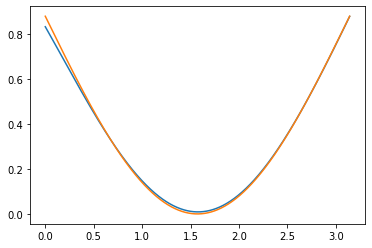

In [34]:

plt.plot(x_test, func2.detach().numpy())
plt.plot(x_test, (1 - np.sin(x_test))*np.cos(0.5))

In [35]:

#plt.plot(x_test, pred.detach().numpy())
#plt.plot(x_test, exact.detach().numpy())

In [36]:
#Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((func2 - p)**2)/torch.mean(p**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  80.75385689735413 %


In [37]:
torch.mean(torch.abs(func2-p))

tensor(0.3005, grad_fn=<MeanBackward0>)

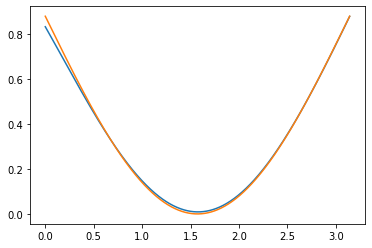

In [38]:

plt.plot(x_test, func2.detach().numpy())
plt.plot(x_test, p)

In [39]:
torch.mean(p-func2)**2/torch.mean(p)**2

tensor(1.1440e-06, grad_fn=<DivBackward0>)

In [40]:
func2.shape

torch.Size([10000])

In [41]:
p.shape

torch.Size([10000, 1])

In [42]:
p = p.reshape(-1,)

In [43]:
#Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((func2 - p)**2)/torch.mean(p**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  0.08105954038910568 %


In [44]:
# contour plot

In [45]:
x1 = pi*torch.rand(1000000)
t1 = 0.5*torch.rand(1000000)
x1 = x1.reshape(-1, 1)
t1 = t1.reshape(-1, 1)
s = torch.cat([x1, t1], 1)
u_pred = my_network(s)
func2 = u_pred[:,4].reshape(-1, )
func2 = func2.detach().numpy()
x1 = x1.reshape(-1, )
t1 = t1.reshape(-1, )
x1 = x1.detach().numpy()
t1 = t1.detach().numpy()
u_test = (1-np.sin(x1))*np.cos(t1)

print(func2.shape)
print(x1.shape)
print(t1.shape)

(1000000,)
(1000000,)
(1000000,)


In [46]:
r_f = np.abs(func2 - u_test)

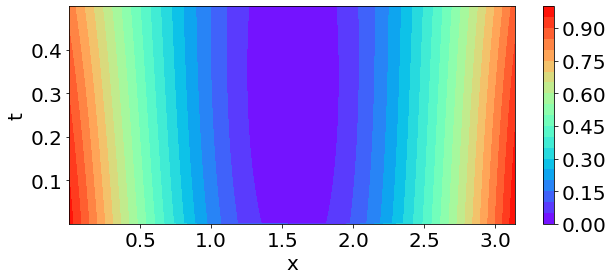

In [47]:
plt.rcParams['figure.figsize'] = [10, 4]
CS = plt.tricontourf(x1, t1, func2, 20, cmap='rainbow')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.savefig('inverse_func_doublebeam_noise.png', dpi = 300, bbox_inches = "tight")
plt.show()

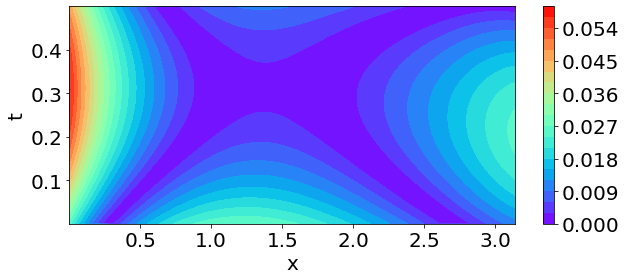

In [48]:
plt.rcParams['figure.figsize'] = [10, 4]
CS = plt.tricontourf(x1, t1, r_f, 20, cmap='rainbow')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.savefig('inverse_error_doublebeam_noise.png', dpi = 300, bbox_inches = "tight")
plt.show()

In [49]:
exact = (1 - np.sin(x1))*np.cos(t1)

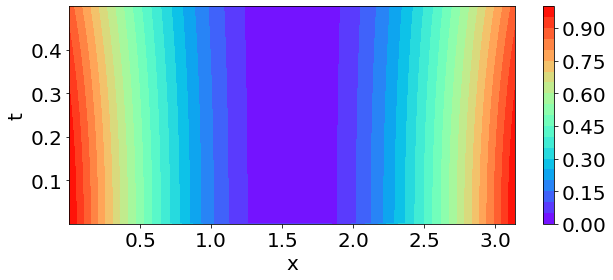

In [50]:
plt.rcParams['figure.figsize'] = [10, 4]
CS = plt.tricontourf(x1, t1, u_test, 20, cmap='rainbow')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.savefig('inverse_func_doublebeam_noise.png', dpi = 300, bbox_inches = "tight")
plt.show()